# Project WebScrubbing and EDA analysis
    Topic : Covid Analysis of world-wide data


# AIM:

# In this project, I want to know  Top 5 which are risky in living & Top 5 which are save places for living based on given data
   
   In the present situation the whole world is facing the stressful pandemic due to covid-19.
   
i've taken the worldwide data of covid-19 like in two cases one is daily-wise data and the other is weekly-wise data. so, from these two i want to know some of the places/countries which are safe in living and danger/risky in living. With the help of Python pandas & Numpy concept, we will create the DataFrame and save in the form of Excel. Then we will apply some Data cleansing, Engineering Featuring concept and EDA analysis. Aim: my aim to write this code, because, I want to know which countries are having highest cases i.e., highly effected area and which countries are having less cases and less death rate which is safe for living.

so, i've taken daily wise data and weekly wise data did some of the stats and figured out top 5 places that are highly in risky stage and also another top 5 areas where the situation is not that worst but recovered or less effected.


# Python libraries used:
    1. requests: This is used to extract the HTML code from the given URL.
    2. BeautifulSoup: This is used to format and read the HTML content.
    3. re (Regular Expression)
    4. Numpy, Pandas, matplotlib, Seaborn etc...(With the help of we will create the Clean dataFrame and Analyse like Descriptive and Daignostic Analysis)

# Import all relavent libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import requests
from bs4 import BeautifulSoup

import re

In [2]:
URL = "https://www.worldometers.info/coronavirus/"

In [3]:
page = requests.get(URL)

In [4]:
page.status_code

200

In [5]:
pagecontent = page.text

In [6]:
soup = BeautifulSoup(pagecontent)

# Web scraping

       Content : Web scraping, web harvesting, or web data extraction is data scraping used for extracting data from websites. 
    
    
### Following details about coronavirus cases are collected in the table-1:


1. Country Name
2. Total Cases
3. New Cases
4. Total Deaths
5. New Deaths
6. Total Recovered
7. Active Cases
8. Critical Cases
9. Total Tests
10. Population    

## Scraping data from Worldometers


In [7]:
# todays data
my_table = soup.find('tbody')

#my_table

Collecting HTML Data in the form of table

In [8]:

#today data daily data

table_data = []

for row in my_table.findAll('tr'):
    row_data = []

    for cell in row.findAll('td'):
        row_data.append(cell.text)

    if(len(row_data) > 0):
        data_item = {
            "Country": row_data[1],
            "Total Cases": row_data[2],
            "New Cases": row_data[3],
            "Total Deaths": row_data[4],
            "New Deaths": row_data[5],
            "Total Recovered": row_data[6],
            "Active Cases": row_data[7],
            "Critical Cases": row_data[8],
            "Tot case/ 1M pop": row_data[9],
            "Tot death/1M pop": row_data[10],
            "Total Tests": row_data[11],
            "Tot test/1M pop": row_data[12],
            "Population": row_data[13],
        }
        table_data.append(data_item)
        
#table_data        

# Create DataFrame
    All Web Screping Data stored in the Lists, code i have written in the last cell, and now we want to Analyse so      we have to store these all list data in the DataFrame. 

converting this created table into dataframe

In [9]:
d_f1 = pd.DataFrame(table_data)
d_f1

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot case/ 1M pop,Tot death/1M pop,Total Tests,Tot test/1M pop,Population
0,\nNorth America\n,"39,530,416","+7,997","885,791",+224,"32,231,770","+9,782","6,412,855","14,684",,,,
1,\nAsia\n,"49,738,601","+248,218","656,920","+4,378","45,122,397","+304,122","3,959,284","31,543",,,,
2,\nSouth America\n,"27,851,515","+6,782","756,544",+98,"25,123,846","+7,577","1,971,125","29,228",,,,
3,\nEurope\n,"46,283,283","+38,828","1,063,480","+1,374","42,930,300","+97,628","2,289,503","17,991",,,,
4,\nAfrica\n,"4,813,221","+3,652","129,083",+58,"4,340,284","+3,534","343,854","2,764",,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Marshall Islands,4,,,,4,,0,,67,,,
226,Samoa,3,,,,3,,0,,15,,,
227,Saint Helena,2,,,,2,,0,,328,,,
228,Micronesia,1,,,,1,,0,,9,,,


In [10]:
d_f1.head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot case/ 1M pop,Tot death/1M pop,Total Tests,Tot test/1M pop,Population
0,\nNorth America\n,"39,530,416","+7,997","885,791",+224,"32,231,770","+9,782","6,412,855","14,684",,,,
1,\nAsia\n,"49,738,601","+248,218","656,920","+4,378","45,122,397","+304,122","3,959,284","31,543",,,,
2,\nSouth America\n,"27,851,515","+6,782","756,544",+98,"25,123,846","+7,577","1,971,125","29,228",,,,
3,\nEurope\n,"46,283,283","+38,828","1,063,480","+1,374","42,930,300","+97,628","2,289,503","17,991",,,,
4,\nAfrica\n,"4,813,221","+3,652","129,083",+58,"4,340,284","+3,534","343,854","2,764",,,,
5,\nOceania\n,"67,626",+68,"1,245",,"65,155",+93,"1,226",3,,,,
6,\n\n,721,,15,,706,,0,0,,,,
7,World,"168,285,383","+305,545","3,493,078","+6,132","149,814,458","+422,736","14,977,847","96,213","21,589",448.1,,
8,USA,"33,924,707","+1,770","604,478",+62,"27,564,594",+664,"5,755,635","6,848","101,956","1,817","474,388,680","1,425,710"
9,India,"27,122,158","+174,662","310,416","+3,167","24,278,735","+230,975","2,533,007","8,944","19,483",223,"332,594,176","238,911"


In [11]:
d_f1.shape

(230, 13)

In [12]:
d_f1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           230 non-null    object
 1   Total Cases       230 non-null    object
 2   New Cases         230 non-null    object
 3   Total Deaths      230 non-null    object
 4   New Deaths        230 non-null    object
 5   Total Recovered   230 non-null    object
 6   Active Cases      230 non-null    object
 7   Critical Cases    230 non-null    object
 8   Tot case/ 1M pop  230 non-null    object
 9   Tot death/1M pop  230 non-null    object
 10  Total Tests       230 non-null    object
 11  Tot test/1M pop   230 non-null    object
 12  Population        230 non-null    object
dtypes: object(13)
memory usage: 23.5+ KB


# Observation:
    There is no null value and all columns are objectionable data type (if necessary, we will change to engineering Featuring Concept)
    

     The 'iloc()' function is used to extract multiple rows with either by using range or passing it by list but better to use range 

In [13]:
d_f2 = d_f1.iloc[8:230]

In [14]:
d_f2

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot case/ 1M pop,Tot death/1M pop,Total Tests,Tot test/1M pop,Population
8,USA,"33,924,707","+1,770","604,478",+62,"27,564,594",+664,"5,755,635","6,848","101,956","1,817","474,388,680","1,425,710"
9,India,"27,122,158","+174,662","310,416","+3,167","24,278,735","+230,975","2,533,007","8,944","19,483",223,"332,594,176","238,911"
10,Brazil,"16,121,136",,"450,026",,"14,552,024",,"1,119,086","8,318","75,364","2,104","49,013,934","229,133"
11,France,"5,605,895",,"108,658",,"5,222,049",,"275,188","3,496","85,713","1,661","83,136,527","1,271,146"
12,Turkey,"5,203,385","+9,375","46,621",+175,"5,045,508","+11,192","111,256","1,667","61,109",548,"52,817,437","620,291"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Marshall Islands,4,,,,4,,0,,67,,,
226,Samoa,3,,,,3,,0,,15,,,
227,Saint Helena,2,,,,2,,0,,328,,,
228,Micronesia,1,,,,1,,0,,9,,,


# Top 10 row of the DataFrame

In [15]:
d_f2.head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot case/ 1M pop,Tot death/1M pop,Total Tests,Tot test/1M pop,Population
8,USA,"33,924,707","+1,770","604,478",+62,"27,564,594",+664,"5,755,635","6,848","101,956","1,817","474,388,680","1,425,710"
9,India,"27,122,158","+174,662","310,416","+3,167","24,278,735","+230,975","2,533,007","8,944","19,483",223,"332,594,176","238,911"
10,Brazil,"16,121,136",,"450,026",,"14,552,024",,"1,119,086","8,318","75,364","2,104","49,013,934","229,133"
11,France,"5,605,895",,"108,658",,"5,222,049",,"275,188","3,496","85,713","1,661","83,136,527","1,271,146"
12,Turkey,"5,203,385","+9,375","46,621",+175,"5,045,508","+11,192","111,256","1,667","61,109",548,"52,817,437","620,291"
13,Russia,"5,017,795","+7,884","119,194",+393,"4,632,955","+8,743","265,646","2,300","34,371",816,"136,100,000","932,252"
14,UK,"4,467,310","+2,493","127,739",+15,"4,305,971","+2,350","33,600",121,"65,498","1,873","178,307,058","2,614,282"
15,Italy,"4,197,892","+3,224","125,501",+166,"3,804,246","+11,348","268,145","1,323","69,522","2,078","64,918,613","1,075,129"
16,Germany,"3,660,547",+557,"88,054",+15,"3,423,700","+14,900","148,793","3,477","43,566","1,048","59,197,639","704,535"
17,Spain,"3,652,879","+5,359","79,801",+90,"3,402,258","+7,918","170,820","1,552","78,101","1,706","49,708,830","1,062,813"


In [16]:
d_f2.shape

(222, 13)

# DataFrame store in the CSV file

In [17]:
# Exporting data

d_f2.to_csv("SriNidhi_Project.csv")

# Read Data from the CSV file

In [18]:
# Importing data

d_f3 = pd.read_csv('SriNidhi_Project.csv')


In [19]:
#Remove Unwanted Column
d_f3.drop('Unnamed: 0',axis=1,inplace=True)

In [20]:
d_f3

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot case/ 1M pop,Tot death/1M pop,Total Tests,Tot test/1M pop,Population
0,USA,"33,924,707","+1,770","604,478",+62,"27,564,594",+664,"5,755,635","6,848","101,956","1,817","474,388,680","1,425,710"
1,India,"27,122,158","+174,662","310,416","+3,167","24,278,735","+230,975","2,533,007","8,944","19,483",223,"332,594,176","238,911"
2,Brazil,"16,121,136",NaN,"450,026",NaN,"14,552,024",NaN,"1,119,086","8,318","75,364","2,104","49,013,934","229,133"
3,France,"5,605,895",NaN,"108,658",NaN,"5,222,049",NaN,"275,188","3,496","85,713","1,661","83,136,527","1,271,146"
4,Turkey,"5,203,385","+9,375","46,621",+175,"5,045,508","+11,192","111,256","1,667","61,109",548,"52,817,437","620,291"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Marshall Islands,4,NaN,,NaN,4,NaN,0,NaN,67,NaN,NaN,NaN
218,Samoa,3,NaN,,NaN,3,NaN,0,NaN,15,NaN,NaN,NaN
219,Saint Helena,2,NaN,,NaN,2,NaN,0,NaN,328,NaN,NaN,NaN
220,Micronesia,1,NaN,,NaN,1,NaN,0,NaN,9,NaN,NaN,NaN


In [21]:
d_f2.sort_values(by='Total Deaths', ascending=False, inplace=True)
d_f2.set_index(np.arange(1,223),inplace=True)

<ipython-input-21-944142df29c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d_f2.sort_values(by='Total Deaths', ascending=False, inplace=True)


# Top 5 row of the DataFrame

In [22]:
d_f2.head(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot case/ 1M pop,Tot death/1M pop,Total Tests,Tot test/1M pop,Population
1,CAR,"7,079",,97,,"6,665",,317,2,"1,443",20,"54,319","11,075"
2,Finland,"91,744",+125,942,+3,"46,000",,"44,802",18,"16,535",170,"4,916,743","886,151"
3,Gibraltar,"4,290",+3,94,,"4,192",,4,,"127,368","2,791","250,408","7,434,475"
4,Jamaica,"48,081",+27,931,+6,"24,226",+121,"22,924",15,"16,174",313,"369,226","124,204"
5,Martinique,"11,866",,93,,98,,"11,675",10,"31,642",248,"174,717","465,907"
6,Australia,"30,029",+10,910,,"29,000",,119,1,"1,166",35,"17,905,982","694,999"
7,Cuba,"135,499","+1,291",901,+11,"127,614","+1,155","6,984",138,"11,969",80,"4,193,872","370,470"
8,Tajikistan,"13,308",,90,,"13,218",,0,,"1,368",9,,
9,San Marino,"5,089",,90,,"4,995",,4,4,"149,698","2,647","65,149","1,916,429"
10,Jordan,"732,356",+920,"9,395",+11,"712,458",+844,"10,503",637,"71,147",913,"7,162,353","695,806"


# Last 5 row of the DataFrame

In [23]:
d_f2.tail(10)

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,Active Cases,Critical Cases,Tot case/ 1M pop,Tot death/1M pop,Total Tests,Tot test/1M pop,Population
213,Samoa,3,,,,3,,0,,15,,,
214,Marshall Islands,4,,,,4,,0,,67,,,
215,Solomon Islands,20,,,,20,,0,,28,,"4,500","6,412"
216,Falkland Islands,63,,,,63,,0,,"17,647",,"7,258","2,033,053"
217,Saint Pierre Miquelon,25,,,,25,,0,,"4,334",,"5,736","994,280"
218,Vatican City,27,,,,27,,0,,"33,624",,,
219,Greenland,34,,,,32,,2,,598,,"23,980","421,752"
220,Macao,51,+1,,,49,,2,,78,,"4,483","6,821"
221,New Caledonia,126,+1,,,58,,68,,438,,"32,709","113,593"
222,Saint Kitts and Nevis,60,+8,,,45,,15,,"1,121",,"14,662","273,877"


In [24]:
d_f3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Country           222 non-null    object
 1   Total Cases       222 non-null    object
 2   New Cases         115 non-null    object
 3   Total Deaths      222 non-null    object
 4   New Deaths        85 non-null     object
 5   Total Recovered   222 non-null    object
 6   Active Cases      101 non-null    object
 7   Critical Cases    222 non-null    object
 8   Tot case/ 1M pop  149 non-null    object
 9   Tot death/1M pop  220 non-null    object
 10  Total Tests       206 non-null    object
 11  Tot test/1M pop   210 non-null    object
 12  Population        210 non-null    object
dtypes: object(13)
memory usage: 22.7+ KB


Changing the data type to req one:

In [25]:
#done 1

list_01=[]
for i in d_f3['Total Cases']:
    if i=='':
        list_01.append('0')
    else:
        list_01.append(i)
        
        
        
k_1=[]
for i in list_01:
    #print(i,type(i))
    #print(type(int(i)))
    r_1=i.replace('+','')
    k_1.append(int((r_1.replace(',',''))))

type(k_1[0])

int

In [26]:
len(k_1)

222

In [27]:
#done

list_02=[]
for i in d_f3['New Cases']:
    if i==0:
        list_02.append('0')
    else:
        list_02.append(i)
        
#list_02        
        
k_2=[]
for i in list_02:
    if type(i) == float:
        k_2.append(0)
    else:
        r_2=i.replace('+','')
        k_2.append(int((r_2.replace(',',''))))
    #print(i,type(i))
    #print(type(int(i)))
        
type(k_2[0])


int

In [28]:
len(k_2)

222

In [29]:
#done


list_03=[]
for i in d_f3['Total Deaths']:
    if i==' ':
        list_03.append('0')
    else:
        list_03.append(i)
        
        
        
k_3=[]
for i in list_03:
    #print(i,type(i))
    #print(type(int(i)))
    r_3=i.replace('+','')
    k_3.append(int((r_3.replace(',',''))))

type(k_3[0])


int

In [30]:
len(k_3)

222

In [31]:
#done

list_04=[]
for i in d_f3['New Deaths']:
    if i=='':
        list_04.append('0')
    else:
        list_04.append(i)
        
k_4=[]
for i in list_04:
    #print(i,type(i))
    #print(type(int(i)))
    if type(i)==float:
        k_4.append(0)
    else:
        r_4=i.replace('+','')
        k_4.append(int((r_4.replace(',',''))))

type(k_4[0])        
      


int

In [32]:
#done

list_05=[]
for i in d_f3['Total Recovered']:
    if i=='':
        list_05.append('0')
    else:
        list_05.append(i)
        
        
        
k_5=[]
for i in list_05:
    #print(i,type(i))
    #print(type(int(i)))
    r_5=i.replace('+','')
    k_5.append(int((r_5.replace(',',''))))

type(k_5[0])


int

In [33]:
len(k_5)

222

In [34]:
#done

list_06=[]
for i in d_f3['Active Cases']:
    if i==0:
        list_06.append('0')
    else:
        list_06.append(i)
        
        
k_6=[]
for i in list_06:
    #print(i,type(i))
    #print(type(int(i)))
    if type(i)==float:
        k_6.append(0)
    else:
        r_6=i.replace('+','')
        k_6.append(int((r_6.replace(',',''))))

type(k_6[0])        


int

In [35]:
len(k_6)

222

In [36]:
#done

list_07=[]
for i in d_f3['Critical Cases']:
    if i=='':
        list_07.append('0')
    else:
        list_07.append(i)
        
        
        
k_7=[]
for i in list_07:
    if type(i) == float:
        k_7.append(0)
    else:
        
    #print(i,type(i))
    #print(type(int(i)))
        r_7=i.replace('+','')
        k_7.append(int((r_7.replace(',',''))))

type(k_7[0])


int

In [37]:
len(k_7)

222

In [38]:
#done


list_08=[]
for i in d_f3['Tot case/ 1M pop']:
    if i=='':
        list_08.append('0')
    else:
        list_08.append(i)

len(list_08)


222

In [39]:
len(d_f3['Tot case/ 1M pop'])

222

In [40]:
k_8=[]
for i in list_08:
    #print(i,type(i))
    #print(type(int(i)))
    if type(i)==float:
        k_8.append(0)
    else:
        r_8=i.replace('+','')
        k_8.append(int((r_8.replace(',',''))))

type(k_8[0])

int

In [41]:
len(k_8)

222

In [42]:
#done

list_09 = []
for i in d_f3['Tot death/1M pop']:
    if i == '':
        list_09.append('0')
    else:
        list_09.append(i)
        
k_9 = []
for i in list_09:
    if type(i) == float:
        k_9.append(0)
    else:
        r_9 = i.replace('+','')
        k_9.append(int((r_9.replace(',',''))))
    
type(k_9[0])


int

In [43]:
len(k_9)

222

In [44]:
#done

list_10 = []
for i in d_f3['Total Tests']:
    if i == '':
        list_10.append('0')
    else:
        list_10.append(i)
        

k_10 = []
for i in list_10:
    if type(i)==float:
        k_10.append(0.0)
    else:
        r_10 = i.replace('+','')
        k_10.append(float((r_10.replace(',',''))))
    
type(k_10[0])


float

In [45]:
d_f3['Total Tests'].unique()

array(['1,817', '223', '2,104', '1,661', '548', '816', '1,873', '2,078',
       '1,048', '1,706', '1,635', '1,659', '1,933', '931', '1,703',
       '1,142', '2,048', '180', '2,801', '932', '1,023', '665', '1,484',
       '181', '396', '1,571', '1,415', '2,136', '91', '1,674', '687',
       '3,069', '75', '913', '98', '781', '1,238', '1,166', '166',
       '1,131', '226', '72', '245', '206', '1,130', '2,538', '1,144',
       '2,252', '295', '202', '1,450', '1,947', '1,187', '1,169', '1,029',
       '1,175', '477', '666', '749', '402', '330', '432', '1,566', '35',
       '1,126', '991', '142', '1,511', '2,096', '440', '616', '89',
       '1,482', '491', '196', '437', '2,810', '448', '58', '56', '10',
       '2,564', '59', '38', '80', '12', '851', '1,254', '935', '77',
       '143', '267', '2,511', '20', '25', '67', '170', '46', '341', '293',
       '26', '1,279', '5', '253', '302', '338', '313', '11', '8', '66',
       '29', '105', '22', '944', '460', '210', '97', '65', '370', '278',
   

In [46]:
#done

list_11 = []
for i in d_f3['Tot test/1M pop']:
    if i == '':
        list_11.append('0')
    else:
        list_11.append(i)
        
k_11 = []
for i in list_11:
    if type(i)==float:
        k_11.append(0)
    else:
        r_11 = i.replace('+','')
        k_11.append(int((r_11.replace(',',''))))
    
type(k_11[0])

int

In [47]:
len(k_11)

222

In [48]:
len(d_f3['Tot test/1M pop'])

222

In [49]:
len(list_11)

222

In [50]:
#done

list_12 = []
for i in d_f3['Population']:
    if i == '':
        list_12.append('0')
    else:
        list_12.append(i)
        
k_12 = []
for i in list_12:
    if type(i) == float:
        k_12.append(0)
    else:
        r_12 = i.replace('+','')
        k_12.append(int((r_12.replace(',',''))))
    
    
type(k_12[0])

int

In [51]:
len(k_12)

222

In [52]:
d_f_4=pd.DataFrame()

In [53]:
len(d_f_4)

0

In [54]:
d_f_4['Country']=d_f3['Country']
d_f_4['Total_Cases']=k_1

In [55]:
d_f_4['New_Cases'] = k_2  

In [56]:
d_f_4['Total_Deaths']=k_3

In [57]:
d_f_4['New_Deaths'] = k_4

In [58]:
d_f_4['Total_Recovered'] = k_5

In [59]:
d_f_4['Active_Cases'] = k_6 

In [60]:
d_f_4['Critical_Cases']= k_7

In [61]:
d_f_4['Population'] = k_12

In [62]:
d_f_4['Tot_case_1M_pop'] = k_8

In [63]:
d_f_4['Tot_death_1M_pop'] = k_9

In [64]:
d_f_4['Total_Tests'] = k_10

In [65]:

d_f_4['Tot_Tests_1M_pop'] = k_11

In [66]:
d_f_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           222 non-null    object 
 1   Total_Cases       222 non-null    int64  
 2   New_Cases         222 non-null    int64  
 3   Total_Deaths      222 non-null    int64  
 4   New_Deaths        222 non-null    int64  
 5   Total_Recovered   222 non-null    int64  
 6   Active_Cases      222 non-null    int64  
 7   Critical_Cases    222 non-null    int64  
 8   Population        222 non-null    int64  
 9   Tot_case_1M_pop   222 non-null    int64  
 10  Tot_death_1M_pop  222 non-null    int64  
 11  Total_Tests       222 non-null    float64
 12  Tot_Tests_1M_pop  222 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 22.7+ KB


## DataFrame Read for complete understanding

In [67]:
#LENGTH
print(len(d_f_4))

222


In [68]:
#SHAPE OF THE DATA
d_f_4.shape

(222, 13)

In [69]:
#ALL COLUMNS
d_f_4.columns

Index(['Country', 'Total_Cases', 'New_Cases', 'Total_Deaths', 'New_Deaths',
       'Total_Recovered', 'Active_Cases', 'Critical_Cases', 'Population',
       'Tot_case_1M_pop', 'Tot_death_1M_pop', 'Total_Tests',
       'Tot_Tests_1M_pop'],
      dtype='object')

In [70]:
#No null value found in the columns
d_f_4.isnull().sum()

Country             0
Total_Cases         0
New_Cases           0
Total_Deaths        0
New_Deaths          0
Total_Recovered     0
Active_Cases        0
Critical_Cases      0
Population          0
Tot_case_1M_pop     0
Tot_death_1M_pop    0
Total_Tests         0
Tot_Tests_1M_pop    0
dtype: int64

After Changing dtype from Object to int our dataframe 

In [71]:
d_f_4

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Critical_Cases,Population,Tot_case_1M_pop,Tot_death_1M_pop,Total_Tests,Tot_Tests_1M_pop
0,USA,33924707,1770,604478,62,27564594,664,5755635,1425710,6848,101956,1817.0,474388680
1,India,27122158,174662,310416,3167,24278735,230975,2533007,238911,8944,19483,223.0,332594176
2,Brazil,16121136,0,450026,0,14552024,0,1119086,229133,8318,75364,2104.0,49013934
3,France,5605895,0,108658,0,5222049,0,275188,1271146,3496,85713,1661.0,83136527
4,Turkey,5203385,9375,46621,175,5045508,11192,111256,620291,1667,61109,548.0,52817437
...,...,...,...,...,...,...,...,...,...,...,...,...,...
217,Marshall Islands,4,0,0,0,4,0,0,0,0,67,0.0,0
218,Samoa,3,0,0,0,3,0,0,0,0,15,0.0,0
219,Saint Helena,2,0,0,0,2,0,0,0,0,328,0.0,0
220,Micronesia,1,0,0,0,1,0,0,0,0,9,0.0,0


In [72]:
d_f_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           222 non-null    object 
 1   Total_Cases       222 non-null    int64  
 2   New_Cases         222 non-null    int64  
 3   Total_Deaths      222 non-null    int64  
 4   New_Deaths        222 non-null    int64  
 5   Total_Recovered   222 non-null    int64  
 6   Active_Cases      222 non-null    int64  
 7   Critical_Cases    222 non-null    int64  
 8   Population        222 non-null    int64  
 9   Tot_case_1M_pop   222 non-null    int64  
 10  Tot_death_1M_pop  222 non-null    int64  
 11  Total_Tests       222 non-null    float64
 12  Tot_Tests_1M_pop  222 non-null    int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 22.7+ KB


# Observations:

### Some stats for information 

             In this describe() function computes a summary of statistics in  the DataFrame columns. This function gives the mean, std and IQR values. And, function excludes the character columns and given summary about numeric columns.

In [73]:
d_f_4.Country.describe()

count          222
unique         222
top       Ethiopia
freq             1
Name: Country, dtype: object

In [74]:
d_f_4.Total_Tests.describe()

count     222.000000
mean      545.993243
std       714.717049
min         0.000000
25%        25.000000
50%       204.000000
75%       842.250000
max      3069.000000
Name: Total_Tests, dtype: float64

In [75]:
d_f_4.Total_Cases.describe()

count    2.220000e+02
mean     7.580423e+05
std      3.192845e+06
min      1.000000e+00
25%      5.402750e+03
50%      4.555350e+04
75%      3.349918e+05
max      3.392471e+07
Name: Total_Cases, dtype: float64

In [76]:
d_f_4.New_Cases.describe()

count       222.000000
mean       1376.328829
std       11790.551967
min           0.000000
25%           0.000000
50%           1.500000
75%         336.500000
max      174662.000000
Name: New_Cases, dtype: float64

In [77]:
d_f_4.Total_Recovered.describe()

count    2.220000e+02
mean     6.748399e+05
std      2.740942e+06
min      1.000000e+00
25%      3.765250e+03
50%      3.967850e+04
75%      2.943920e+05
max      2.756459e+07
Name: Total_Recovered, dtype: float64

## Observation

Because it is a Daily-wise-Data table it keeps on changing/Updating continuosly so i've taken data what i needed for any further changes it depends on what required.

In [78]:
#top 10

d_f_4.head(10)

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Critical_Cases,Population,Tot_case_1M_pop,Tot_death_1M_pop,Total_Tests,Tot_Tests_1M_pop
0,USA,33924707,1770,604478,62,27564594,664,5755635,1425710,6848,101956,1817.0,474388680
1,India,27122158,174662,310416,3167,24278735,230975,2533007,238911,8944,19483,223.0,332594176
2,Brazil,16121136,0,450026,0,14552024,0,1119086,229133,8318,75364,2104.0,49013934
3,France,5605895,0,108658,0,5222049,0,275188,1271146,3496,85713,1661.0,83136527
4,Turkey,5203385,9375,46621,175,5045508,11192,111256,620291,1667,61109,548.0,52817437
5,Russia,5017795,7884,119194,393,4632955,8743,265646,932252,2300,34371,816.0,136100000
6,UK,4467310,2493,127739,15,4305971,2350,33600,2614282,121,65498,1873.0,178307058
7,Italy,4197892,3224,125501,166,3804246,11348,268145,1075129,1323,69522,2078.0,64918613
8,Germany,3660547,557,88054,15,3423700,14900,148793,704535,3477,43566,1048.0,59197639
9,Spain,3652879,5359,79801,90,3402258,7918,170820,1062813,1552,78101,1706.0,49708830


### These countries has highest death rate  

       The nlargest() function is used to get the first n rows ordered by columns in descending order . The columns that are not specified are returned as well, but not used for ordering.

In [79]:
large_1 = d_f_4.nlargest(5, "Total_Deaths")
large_1

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Critical_Cases,Population,Tot_case_1M_pop,Tot_death_1M_pop,Total_Tests,Tot_Tests_1M_pop
0,USA,33924707,1770,604478,62,27564594,664,5755635,1425710,6848,101956,1817.0,474388680
2,Brazil,16121136,0,450026,0,14552024,0,1119086,229133,8318,75364,2104.0,49013934
1,India,27122158,174662,310416,3167,24278735,230975,2533007,238911,8944,19483,223.0,332594176
14,Mexico,2397307,703,221695,48,1916144,2043,259468,53379,4798,18421,1703.0,6946817
6,UK,4467310,2493,127739,15,4305971,2350,33600,2614282,121,65498,1873.0,178307058


### These countries has lowest death rate

The nsmallest() function is used to get the first n rows ordered by columns in ascending order.

This method is equivalent to df.sort_values(columns, ascending=True).head(n), but more performant.

Because these are updated continuously it shows 0 values

In [80]:
small_1 = d_f_4.nsmallest(5, "New_Cases")
small_1

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Critical_Cases,Population,Tot_case_1M_pop,Tot_death_1M_pop,Total_Tests,Tot_Tests_1M_pop
2,Brazil,16121136,0,450026,0,14552024,0,1119086,229133,8318,75364,2104.0,49013934
3,France,5605895,0,108658,0,5222049,0,275188,1271146,3496,85713,1661.0,83136527
10,Argentina,3562135,0,74480,0,3133183,0,354472,290924,6373,78175,1635.0,13256309
11,Colombia,3249433,0,85207,0,3046147,0,118079,319648,6582,63259,1659.0,16419432
16,Peru,1926923,0,68358,0,1720665,0,137900,374653,2682,57724,2048.0,12506500


In [81]:
small_2 = d_f_4.nsmallest(5, "Total_Deaths")
small_2

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Critical_Cases,Population,Tot_case_1M_pop,Tot_death_1M_pop,Total_Tests,Tot_Tests_1M_pop
202,Dominica,184,0,0,0,176,0,8,223630,0,2550,0.0,16134
204,New Caledonia,126,1,0,0,58,0,68,113593,0,438,0.0,32709
205,Anguilla,109,0,0,0,107,0,2,1453349,0,7208,0.0,21979
206,Falkland Islands,63,0,0,0,63,0,0,2033053,0,17647,0.0,7258
207,Saint Kitts and Nevis,60,8,0,0,45,0,15,273877,0,1121,0.0,14662


## Observation:

Here in the data, the sort_values() method is taken  to analize the data and only those columns are taken which are required for further 

In [82]:
data1 = pd.DataFrame(d_f_4, columns= ['Country', 'Total_Cases', 'New_Cases','Total_Deaths','New_Deaths','Total_Recovered','Active_Cases','Critical_Cases','Tot_case_1M_pop','Tot_death_1M_pop','Total_Tests','Tot_Tests_1M_pop','Population'])

data1.sort_values(by = ["Total_Cases", "Total_Deaths", "Total_Recovered", "Total_Tests", "Active_Cases","Critical_Cases",],ascending = True, inplace = True)



In [83]:
data1.head(10)

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Critical_Cases,Tot_case_1M_pop,Tot_death_1M_pop,Total_Tests,Tot_Tests_1M_pop,Population
220,Micronesia,1,0,0,0,1,0,0,0,9,0.0,0,0
219,Saint Helena,2,0,0,0,2,0,0,0,328,0.0,0,0
218,Samoa,3,0,0,0,3,0,0,0,15,0.0,0,0
217,Marshall Islands,4,0,0,0,4,0,0,0,67,0.0,0,0
216,Vanuatu,4,0,1,0,3,0,0,0,13,3.0,23000,73359
215,MS Zaandam,9,0,2,0,7,0,0,0,0,0.0,0,0
214,Western Sahara,10,0,1,0,8,0,1,0,16,2.0,0,0
213,Solomon Islands,20,0,0,0,20,0,0,0,28,0.0,4500,6412
212,Montserrat,20,0,1,0,19,0,0,0,4004,200.0,1408,281882
211,Saint Pierre Miquelon,25,0,0,0,25,0,0,0,4334,0.0,5736,994280


# example one:

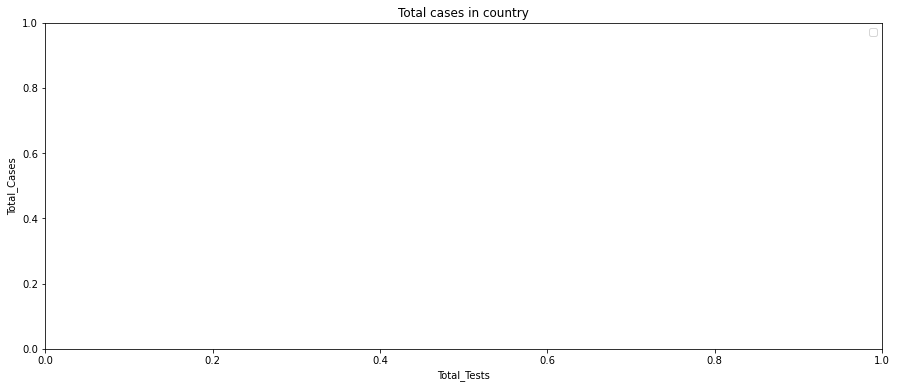

In [84]:
plt.figure(figsize=(15,6))

plt.title('Total cases in country') #title of box
plt.xlabel('Total_Tests') #on x-axis
plt.ylabel('Total_Cases') #on y-axis 
plt.legend(['','']) #right corner for small box
plt.show()#it is not that necessary

### Data = d_f_4

In [85]:
# TOP 10 

d_f_4.head(10)

,Country,Total_Cases,New_Cases,Total_Deaths,New_Deaths,Total_Recovered,Active_Cases,Critical_Cases,Population,Tot_case_1M_pop,Tot_death_1M_pop,Total_Tests,Tot_Tests_1M_pop
0,USA,33924707,1770,604478,62,27564594,664,5755635,1425710,6848,101956,1817.0,474388680
1,India,27122158,174662,310416,3167,24278735,230975,2533007,238911,8944,19483,223.0,332594176
2,Brazil,16121136,0,450026,0,14552024,0,1119086,229133,8318,75364,2104.0,49013934
3,France,5605895,0,108658,0,5222049,0,275188,1271146,3496,85713,1661.0,83136527
4,Turkey,5203385,9375,46621,175,5045508,11192,111256,620291,1667,61109,548.0,52817437
5,Russia,5017795,7884,119194,393,4632955,8743,265646,932252,2300,34371,816.0,136100000
6,UK,4467310,2493,127739,15,4305971,2350,33600,2614282,121,65498,1873.0,178307058
7,Italy,4197892,3224,125501,166,3804246,11348,268145,1075129,1323,69522,2078.0,64918613
8,Germany,3660547,557,88054,15,3423700,14900,148793,704535,3477,43566,1048.0,59197639
9,Spain,3652879,5359,79801,90,3402258,7918,170820,1062813,1552,78101,1706.0,49708830


## Plots:
1. Univarient, 
2. Bivarient, 
3. Multivarient

## Univarient 

These plots enumerate/show every observation in data and provide information about the distribution of the observations on a single data variable.


1. line plot = Good for nominal and small ordinal categorical data.
2. bar plot = Good for ordinal categorical and interval data.
3. area plot = Good for ordinal categorical and interval data.
4. histogram = Good for interval data

BAR CHARTS:

In [86]:
d_f_4['Total_Cases']

0      33924707
1      27122158
2      16121136
3       5605895
4       5203385
         ...   
217           4
218           3
219           2
220           1
221       91006
Name: Total_Cases, Length: 222, dtype: int64

<AxesSubplot:>

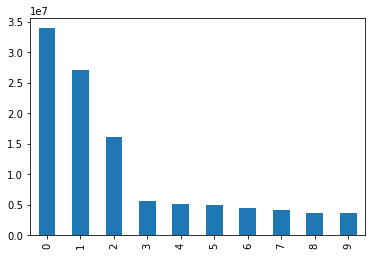

In [87]:
d_f_4['Total_Cases'].nlargest(10).plot.bar()

#d_f_4['Total_Deaths'].head(10).plot.bar()

#sns.countplot(d_f_4.head(10)['Total_Cases']) #seaborn

<AxesSubplot:>

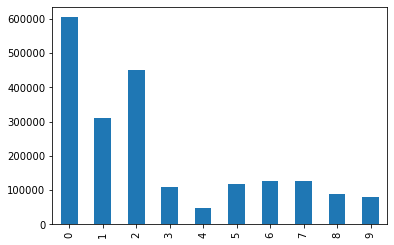

In [88]:
d_f_4['Total_Deaths'].head(10).plot.bar()

<AxesSubplot:>

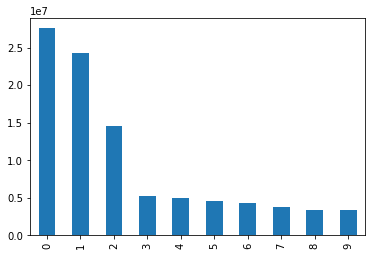

In [89]:
d_f_4['Total_Recovered'].head(10).plot.bar()

## line chart

<AxesSubplot:>

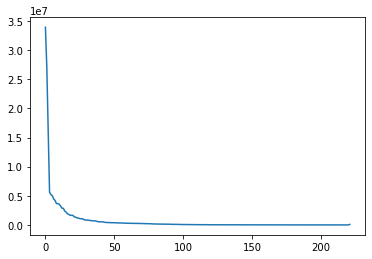

In [90]:
d_f_4['Total_Cases'].sort_index().plot.line()

<AxesSubplot:>

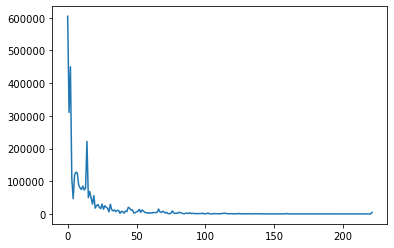

In [91]:
d_f_4['Total_Deaths'].sort_index().plot.line()

<AxesSubplot:>

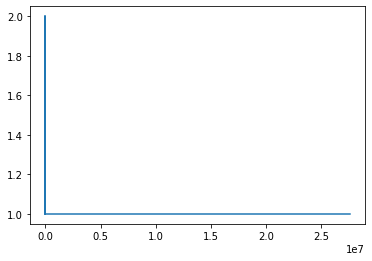

In [92]:
d_f_4['Total_Recovered'].value_counts().sort_index().plot.line()

#area plot

<AxesSubplot:>

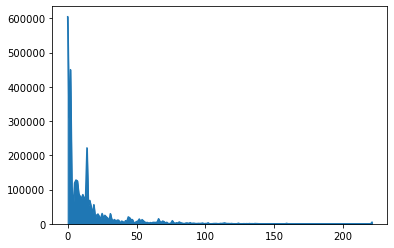

In [93]:
d_f_4['Total_Deaths'].sort_index().plot.area()

# histogram

<AxesSubplot:ylabel='Frequency'>

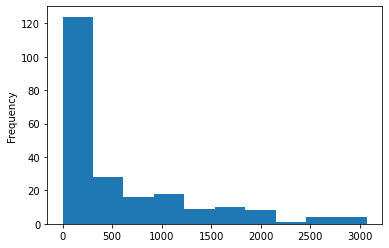

In [94]:
d_f_4['Total_Tests'].plot.hist()


<AxesSubplot:ylabel='Frequency'>

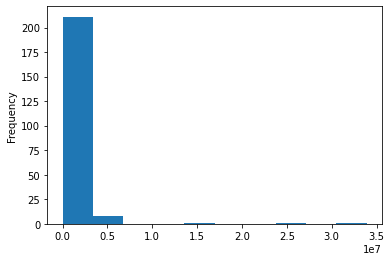

In [95]:

d_f_4['Total_Cases'].plot.hist()

# Bi varient

1. Scatter Plot	= Good for interval and some nominal categorical data.
2. Hex Plot	= Good for interval and some nominal categorical data.
3. Stacked Bar Chart = Good for nominal and ordinal categorical data.
4. Bivariate Line Chart = Good for ordinal categorical and interval data.


## SCATTER

The simplest bivariate plot is the lowly scatter plot. A simple scatter plot simply maps each variable of interest to a point in two-dimensional space. This is the result:

### Observation:

Here "data_1" is taken as new Dataframe in which the only required columns are taken for better use of graphs/plots.

In [96]:
data_1 = pd.DataFrame(d_f_4, columns=['Country','Total_Tests','Total_Cases','Total_Deaths','Total_Recovered','Population'])

data_1.head(10)

,Country,Total_Tests,Total_Cases,Total_Deaths,Total_Recovered,Population
0,USA,1817.0,33924707,604478,27564594,1425710
1,India,223.0,27122158,310416,24278735,238911
2,Brazil,2104.0,16121136,450026,14552024,229133
3,France,1661.0,5605895,108658,5222049,1271146
4,Turkey,548.0,5203385,46621,5045508,620291
5,Russia,816.0,5017795,119194,4632955,932252
6,UK,1873.0,4467310,127739,4305971,2614282
7,Italy,2078.0,4197892,125501,3804246,1075129
8,Germany,1048.0,3660547,88054,3423700,704535
9,Spain,1706.0,3652879,79801,3402258,1062813


In [97]:
data_1.nlargest(5,'Total_Recovered')

,Country,Total_Tests,Total_Cases,Total_Deaths,Total_Recovered,Population
0,USA,1817.0,33924707,604478,27564594,1425710
1,India,223.0,27122158,310416,24278735,238911
2,Brazil,2104.0,16121136,450026,14552024,229133
3,France,1661.0,5605895,108658,5222049,1271146
4,Turkey,548.0,5203385,46621,5045508,620291


<AxesSubplot:xlabel='Country', ylabel='Total_Recovered'>

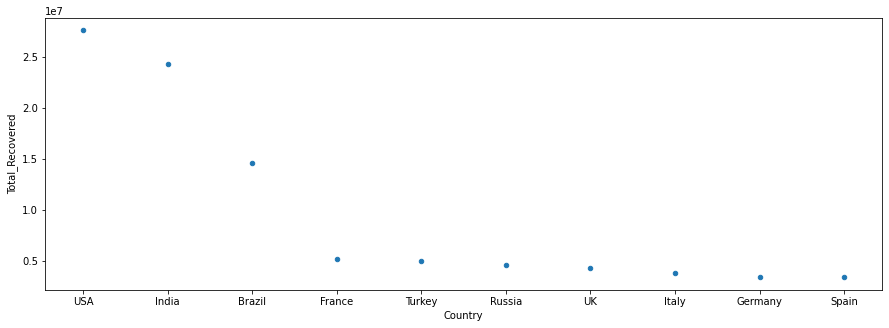

In [98]:
# required less effected countries in world 

plt.rcParams["figure.figsize"] = (15,5)

data_1.nlargest(10,'Total_Recovered').plot.scatter(x='Country', y='Total_Recovered')

#d_f_4[d_f_4['Total_Cases'] < 100].sample(5).plot.scatter(x='Country', y='Total_Cases')
 

# Observations:
## Safe places based on daily wise data

From above and below plots , it clearly shows that these countries are super safe for living because it has 'Highest - Total_Recovered rate' and 'Smallest - Total_Cases'I.E., Less number of cases are present in these areas.

<AxesSubplot:xlabel='Country', ylabel='Total_Cases'>

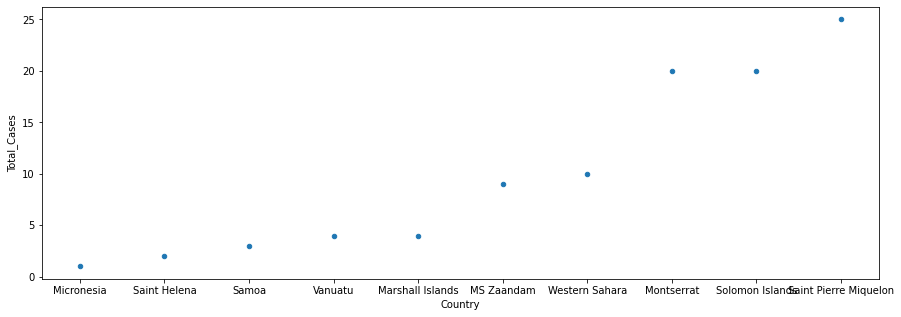

In [99]:
plt.rcParams["figure.figsize"] = (15,5)

data_1.nsmallest(10,'Total_Cases').plot.scatter(x='Country', y='Total_Cases')



# Risky places based on daily wise data
## observation:

Here in this graph it tells that these areas are having highest cases top 10 countries that has highest cases

<AxesSubplot:xlabel='Country', ylabel='Total_Cases'>

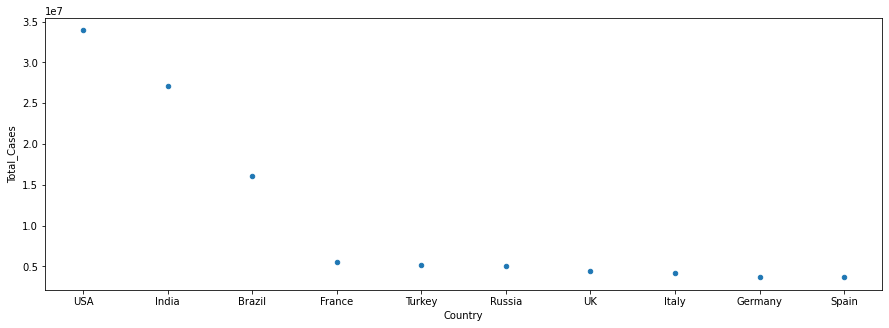

In [100]:
data_1.nlargest(10,'Total_Cases').plot.scatter(x='Country', y='Total_Cases')


## Stacked plots


Scatter plots and hex plots are new. But we can also use the simpler plots we saw in the last notebook.

The easiest way to modify them to support another visual variable is by using stacking. A stacked chart is one which plots the variables one on top of the other.

In this graph it clearly tells that there are spreading of cases are much higher than recovery

## Present scenario all over the world 

<AxesSubplot:>

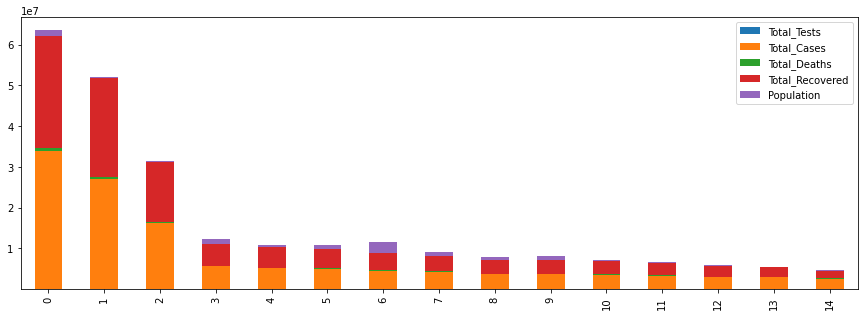

In [101]:
data_1.nlargest(15, 'Total_Cases').plot.bar(stacked=True)

#need y axis to be more specific

Area plot


<AxesSubplot:>

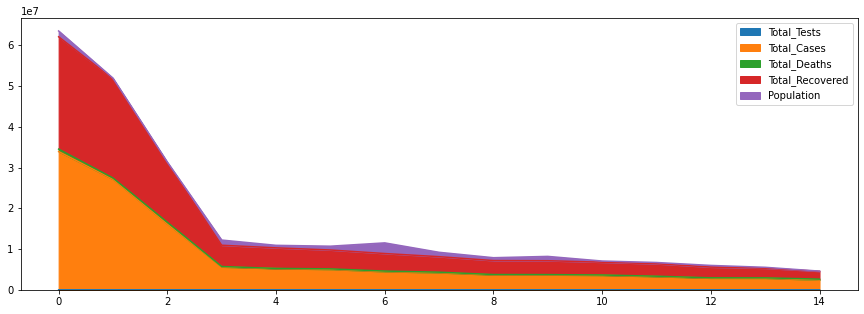

In [102]:


data_1.nlargest(15, 'Total_Cases').plot.area()

In [103]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 222 entries, 0 to 221
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          222 non-null    object 
 1   Total_Tests      222 non-null    float64
 2   Total_Cases      222 non-null    int64  
 3   Total_Deaths     222 non-null    int64  
 4   Total_Recovered  222 non-null    int64  
 5   Population       222 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 10.5+ KB


## Bivariate line chart

One plot type we've seen already that remains highly effective when made bivariate is the line chart. Because the line in this chart takes up so little visual space, it's really easy and effective to overplot multiple lines on the same chart.

#observation:

This plot tells that there are much higher cases all over the world in daily wise i.e., the increase of cases are increasing daily and at the same time the recovery are not as much as high by comparing to spreading cases.

<AxesSubplot:>

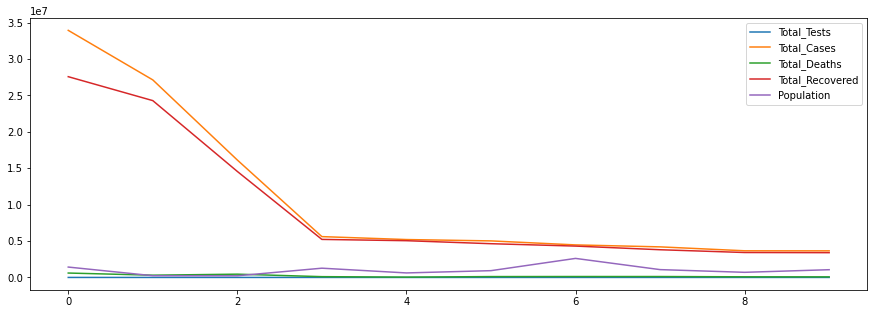

In [104]:
data_1.head(10).plot.line()

By using this --- 

DataFrame.nsmallest(5, "Column name")

DataFrame.nlargest(5,"column name")


From all the above graphs it is concluded that bi-varient plots are providing much information than the other plots.

## In daily wise data it clearly tells that 

highest of 'Total_Deaths' are USA,Brazil, India, Mexico, UK

highest of 'New_Cases' are Mexico,S.Korea,China,NewZealand,Australia

smallest of 'Total_Deaths' are Dominica,New Caledonia,Anguilla,Falkland Islands,Macao

smallest of 'New_Cases' are USA,Brazil,France, Turkey

--USA,Brazil has Highest 'Total_Deaths' rate but also less 'New_Cases'

--Mexico has the highest of 'Total_Deaths','New_Cases'

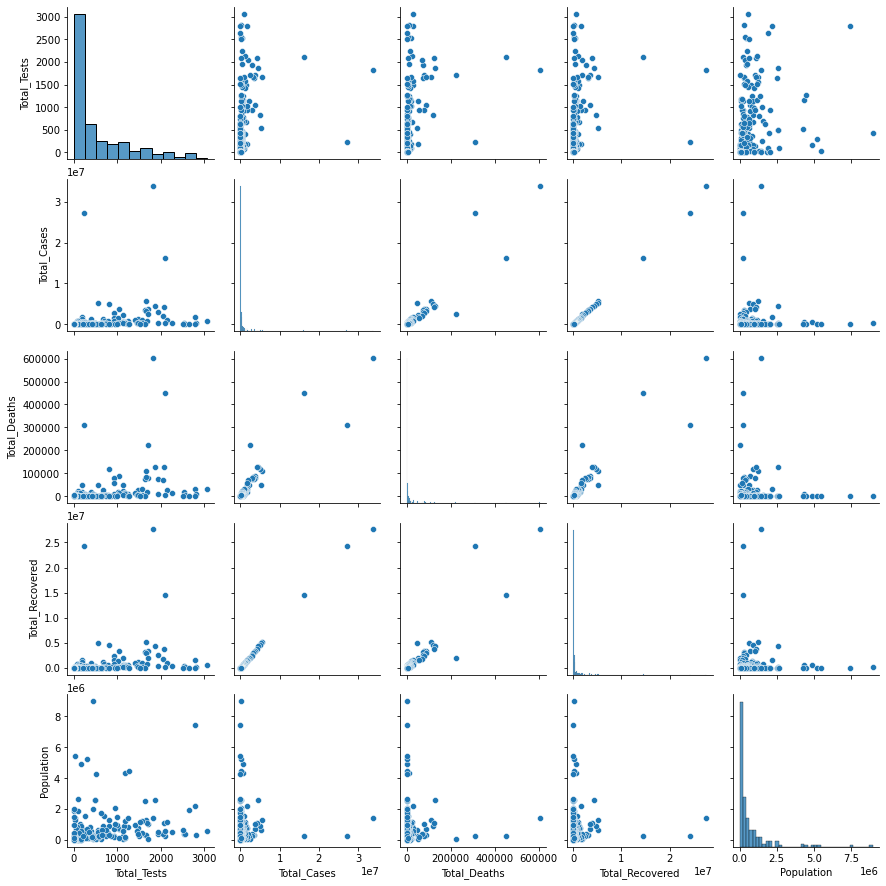

In [105]:
sns.pairplot(data_1)

# weekly data of worldometer

The Above one id daily data analysis of worldwide


Here is the weekly data analysis of worldometer.

Worldometer manually analyzes, validates, and aggregates data from thousands of sources in real time and provides global COVID-19 live statistics for a wide audience of caring people around the world.



In [106]:
URL2 = 'https://www.worldometers.info/coronavirus/weekly-trends/#weekly_table'

In [107]:
page = requests.get(URL)

In [108]:
page.status_code

200

In [109]:
my_table_2 = soup.find('tbody')


## WEB - SCRAPING

Collecting HTML Data in the form of table

In [110]:
# weekly data 

table_data_2 = []

for row in my_table_2.findAll('tr'):
    row_data2 = []

    for cell in row.findAll('td'):
        row_data2.append(cell.text)

    if(len(row_data2) > 0):
        data_item2 = {
            "Country": row_data2[1],
            "Cases in the last 7 days": row_data2[2],
            "Cases in the preceding 7 days": row_data2[3],
            "Weekly case % change": row_data2[4],
            "Cases in the last 7 days/1M pop": row_data2[5],
            "Deaths in the last 7 days": row_data2[6],
            "Deaths in the preceding 7 days": row_data2[7],
            "Weekly Deaths % change": row_data2[8],
            "Deaths in the last 7 days/1M pop": row_data2[9],
            "Weekly Case Change": row_data2[10],
            "Weekly Case Change/1M pop": row_data2[11],
            "Weekly Deaths Change": row_data2[12],
            "Weekly Deaths Change/1M pop": row_data[13],
            "Population": row_data2[14],
        }
        table_data_2.append(data_item2)
        
#table_data_2

# Creating a Dataframe

In [111]:
data_frame_2 = pd.DataFrame(table_data_2)
data_frame_2

,Country,Cases in the last 7 days,Cases in the preceding 7 days,Weekly case % change,Cases in the last 7 days/1M pop,Deaths in the last 7 days,Deaths in the preceding 7 days,Weekly Deaths % change,Deaths in the last 7 days/1M pop,Weekly Case Change,Weekly Case Change/1M pop,Weekly Deaths Change,Weekly Deaths Change/1M pop,Population
0,\nNorth America\n,"39,530,416","+7,997","885,791",+224,"32,231,770","+9,782","6,412,855","14,684",,,,"111,163",
1,\nAsia\n,"49,738,601","+248,218","656,920","+4,378","45,122,397","+304,122","3,959,284","31,543",,,,"111,163",
2,\nSouth America\n,"27,851,515","+6,782","756,544",+98,"25,123,846","+7,577","1,971,125","29,228",,,,"111,163",
3,\nEurope\n,"46,283,283","+38,828","1,063,480","+1,374","42,930,300","+97,628","2,289,503","17,991",,,,"111,163",
4,\nAfrica\n,"4,813,221","+3,652","129,083",+58,"4,340,284","+3,534","343,854","2,764",,,,"111,163",
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,Marshall Islands,4,,,,4,,0,,67,,,"111,163","59,547"
226,Samoa,3,,,,3,,0,,15,,,"111,163","199,593"
227,Saint Helena,2,,,,2,,0,,328,,,"111,163","6,093"
228,Micronesia,1,,,,1,,0,,9,,,"111,163","116,100"


In [112]:
data_frame_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 14 columns):
 #   Column                            Non-Null Count  Dtype 
---  ------                            --------------  ----- 
 0   Country                           230 non-null    object
 1   Cases in the last 7 days          230 non-null    object
 2   Cases in the preceding 7 days     230 non-null    object
 3   Weekly case % change              230 non-null    object
 4   Cases in the last 7 days/1M pop   230 non-null    object
 5   Deaths in the last 7 days         230 non-null    object
 6   Deaths in the preceding 7 days    230 non-null    object
 7   Weekly Deaths % change            230 non-null    object
 8   Deaths in the last 7 days/1M pop  230 non-null    object
 9   Weekly Case Change                230 non-null    object
 10  Weekly Case Change/1M pop         230 non-null    object
 11  Weekly Deaths Change              230 non-null    object
 12  Weekly Deaths Change/1

# Observation:
    There is no null value and all columns are objectionable data type need to be changed to required type.

Here every column is changed seperately that is because we are taking the data of the charts that are updated after the end of the day. so, there are some cases like - data containing some special charecters like =  '+', '0', 'NaN', 'None', ' ', '-' .                  
So, to change/replace them('Special Charecters') before converting.                  
Because we are converting RAW data to Useful data.



In [113]:
list01 = []
for i in data_frame_2:
    if i == "":
        list01.append("0")
    else:
        list01.append(i)
        


In [114]:
k=[]
for i in data_frame_2['Cases in the last 7 days']:
    #print(i,type(i))
    #print(type(int(i)))
    k.append(int((i.replace(',',''))))
    


In [115]:
#done
list01=[]
for i in data_frame_2['Cases in the preceding 7 days']:
    if i=='':
        list01.append('0')
    else:
        list01.append(i)
        
k2=[]
for i in list01:
    #print(i,type(i))
    #print(type(int(i)))
    r=i.replace('+','')
    k2.append(int((r.replace(',',''))))

type(k2[0])

int

In [116]:
# to understand 
data_frame_2['Weekly case % change'].unique()

array(['885,791', '656,920', '756,544', '1,063,480', '129,083', '1,245',
       '15', '3,493,078', '604,478 ', '310,416 ', '450,026 ', '108,658 ',
       '46,621 ', '119,194 ', '127,739 ', '125,501 ', '88,054 ',
       '79,801 ', '74,480 ', '85,207 ', '73,096 ', '79,056 ', '221,695 ',
       '49,685 ', '68,358 ', '49,627 ', '30,041 ', '55,874 ', '17,566 ',
       '25,312 ', '28,585 ', '20,019 ', '16,241 ', '30,040 ', '14,366 ',
       '24,853 ', '20,400 ', '17,021 ', '6,406 ', '29,581 ', '12,401 ',
       '9,395 ', '12,398 ', '6,801 ', '10,786 ', '10,551 ', '1,658 ',
       '7,690 ', '6,700 ', '2,369 ', '9,129 ', '7,278 ', '20,210 ',
       '17,513 ', '11,872 ', '12,301 ', '2,791 ', '3,828 ', '6,346 ',
       '7,950 ', '14,024 ', '4,654 ', '12,273 ', '8,474 ', '4,877 ',
       '3,470 ', '3,849 ', '1,741 ', '3,610 ', '2,510 ', '4,209 ',
       '4,084 ', '3,922 ', '4,941 ', '14,766 ', '6,084 ', '4,358 ',
       '8,009 ', '6,188 ', '2,528 ', '4,400 ', '862 ', '549 ', '2,284 ',
       '9,1

In [117]:
#data


list02 = []
for i in data_frame_2['Weekly case % change']:
    if i == " ":
        list02.append("0")
    else:
        list02.append(i)
        

k3=[]
for i in list02:
    #print(i,type(i))
    #print(type(int(i)))
    r1=i.replace(' ','')
    k3.append(int((i.replace(',',''))))
            

In [118]:
type(k3[0])

int

In [119]:
#done

list03=[]
for i in data_frame_2['Cases in the last 7 days/1M pop']:
    if i=='':
        list03.append('0')
    else:
        list03.append(i)
        
        
        
k4=[]
for i in list03:
    #print(i,type(i))
    #print(type(int(i)))
    r2=i.replace('+','')
    k4.append(int((r2.replace(',',''))))

type(k4[0])


int

In [120]:
#done
list04=[]
for i in data_frame_2['Deaths in the last 7 days']:
    if i=='':
        list04.append('0')
    else:
        list04.append(i)
        
        
        
k5=[]
for i in list04:
    #print(i,type(i))
    #print(type(int(i)))
    r3=i.replace('+','')
    k5.append(int((r3.replace(',',''))))

type(k5[0])


int

In [121]:
#done
list05=[]
for i in data_frame_2['Deaths in the preceding 7 days']:
    if i=='':
        list05.append('0')
    else:
        list05.append(i)
        
        
        
k6=[]
for i in list05:
    #print(i,type(i))
    #print(type(int(i)))
    r4=i.replace('+','')
    k6.append(int((r4.replace(',',''))))

type(k6[0])

int

In [122]:
#done
list06=[]
for i in data_frame_2['Weekly Deaths % change']:
    if i=='':
        list06.append('0')
    else:
        list06.append(i)
        
        
        
k7=[]
for i in list06:
    #print(i,type(i))
    #print(type(int(i)))
    r5=i.replace('+','')
    k7.append(int((r5.replace(',',''))))

type(k7[0])

int

In [123]:
#done
list07=[]
for i in data_frame_2['Deaths in the last 7 days/1M pop']:
    if i=='':
        list07.append('0')
    else:
        list07.append(i)
        
        
        
k8=[]
for i in list07:
    #print(i,type(i))
    #print(type(int(i)))
    r6=i.replace('+','')
    k8.append(int((r6.replace(',',''))))

type(k8[0])

int

In [124]:
#done
list08=[]
for i in data_frame_2['Weekly Case Change']:
    if i=='':
        list08.append('0')
    else:
        list08.append(i)
        
        
        
k9=[]
for i in list08:
    #print(i,type(i))
    #print(type(int(i)))
    r7=i.replace('+','')
    k9.append(int((r7.replace(',',''))))

type(k9[0])

int

In [125]:
data_frame_2['Weekly Case Change/1M pop'].unique()

array(['', '448.1', '1,817', '223', '2,104', '1,661', '548', '816',
       '1,873', '2,078', '1,048', '1,706', '1,635', '1,659', '1,933',
       '931', '1,703', '1,142', '2,048', '180', '2,801', '932', '1,023',
       '665', '1,484', '181', '396', '1,571', '1,415', '2,136', '91',
       '1,674', '687', '3,069', '75', '913', '98', '781', '1,238',
       '1,166', '166', '1,131', '226', '72', '245', '206', '1,130',
       '2,538', '1,144', '2,252', '295', '202', '1,450', '1,947', '1,187',
       '1,169', '1,029', '1,175', '477', '666', '749', '402', '330',
       '432', '1,566', '35', '1,126', '991', '142', '1,511', '2,096',
       '440', '616', '89', '1,482', '491', '196', '437', '2,810', '448',
       '58', '56', '10', '2,564', '59', '38', '80', '12', '851', '1,254',
       '935', '77', '143', '267', '2,511', '20', '25', '67', '170', '46',
       '341', '293', '26', '1,279', '5', '253', '302', '338', '313', '11',
       '8', '66', '29', '105', '22', '944', '460', '210', '97', '65',
    

In [126]:
#done
list09=[]
for i in data_frame_2['Weekly Case Change/1M pop']:
    if i=='':
        list09.append('0')
    else:
        list09.append(i)
        
        
        
k10=[]
for i in list09:
    #print(i,type(i))
    #print(type(int(i)))
    r8=i.replace('+','')
    k10.append(float((r8.replace(',',''))))

type(k10[0])


float

In [127]:
#done
list10=[]
for i in data_frame_2['Weekly Deaths Change']:
    if i=='':
        list10.append('0')
    else:
        list10.append(i)
        
        
        
k11=[]
for i in list10:
    #print(i,type(i))
    #print(type(int(i)))
    r9=i.replace('+','')
    k11.append(int((r9.replace(',',''))))

type(k11[0])

int

In [128]:
#done
list11=[]
for i in data_frame_2['Weekly Deaths Change/1M pop']:
    if i=='':
        list11.append('0')
    else:
        list11.append(i)
        
        
        
k12=[]
for i in list11:
    #print(i,type(i))
    #print(type(int(i)))
    r10=i.replace('+','')
    k12.append(int((r10.replace(',',''))))

type(k12[0])

int

In [129]:
#data_frame_2['Population'].unique()

In [130]:
list12=[]
for i in data_frame_2['Population']:
    if i=='':
        list12.append('0')
    else:
        list12.append(i)
        
        
        
k13=[]
for i in list12:
    #print(i,type(i))
    #print(type(int(i)))
    r11=i.replace(' ','')
    k13.append((r11.replace(',','')))

type(k13[0])

str

In [131]:
k013=[]
for i in k13:
    if i=='':
        k013.append(0)
    else:
        k013.append(int(i))

In [132]:
type(k013[10])

int

Assigning them to another dataframe 

In [133]:
df2=pd.DataFrame()

In [134]:
df2['Country']=data_frame_2['Country']
df2['Case_in_the_last_7_days']=k

In [135]:
df2['Cases_in_the_preceding_7days']=k2

In [136]:
df2['Weekly_Case_%Change']=k3     

In [137]:
df2['Cases_in_the_last_7days/1M_pop']=k4

In [138]:
df2['Deaths_in_the_last_7days'] = k5

In [139]:
df2['Deaths_in_the_preceding_7days'] = k6

In [140]:
df2['Weekly_Deaths_%change'] = k7

In [141]:
df2['Deaths_in_the_last_7days/1M_pop'] = k8

In [142]:
df2['Weekly_Case_Change'] = k9

In [143]:
df2['Weekly_Case_Change/1M_pop'] = k10 

In [144]:
df2['Weekly_Deaths_Change'] = k11

In [145]:
df2['Weekly_Deaths_Change/1M_pop'] = k12

In [146]:
df2['Population'] = k013

In [147]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          230 non-null    object 
 1   Case_in_the_last_7_days          230 non-null    int64  
 2   Cases_in_the_preceding_7days     230 non-null    int64  
 3   Weekly_Case_%Change              230 non-null    int64  
 4   Cases_in_the_last_7days/1M_pop   230 non-null    int64  
 5   Deaths_in_the_last_7days         230 non-null    int64  
 6   Deaths_in_the_preceding_7days    230 non-null    int64  
 7   Weekly_Deaths_%change            230 non-null    int64  
 8   Deaths_in_the_last_7days/1M_pop  230 non-null    int64  
 9   Weekly_Case_Change               230 non-null    int64  
 10  Weekly_Case_Change/1M_pop        230 non-null    float64
 11  Weekly_Deaths_Change             230 non-null    int64  
 12  Weekly_Deaths_Change/1

In [148]:
len(df2)

230

# DataFrame store in the CSV file

In [149]:

df2.to_csv('SriNidhi_Project_1.csv')

# Read Data from the CSV file

In [150]:
df2 = pd.read_csv('SriNidhi_Project_1.csv')

In [151]:
df2

,Unnamed: 0,Country,Case_in_the_last_7_days,Cases_in_the_preceding_7days,Weekly_Case_%Change,Cases_in_the_last_7days/1M_pop,Deaths_in_the_last_7days,Deaths_in_the_preceding_7days,Weekly_Deaths_%change,Deaths_in_the_last_7days/1M_pop,Weekly_Case_Change,Weekly_Case_Change/1M_pop,Weekly_Deaths_Change,Weekly_Deaths_Change/1M_pop,Population
0,0,\nNorth America\n,39530416,7997,885791,224,32231770,9782,6412855,14684,0,0.0,0,111163,0
1,1,\nAsia\n,49738601,248218,656920,4378,45122397,304122,3959284,31543,0,0.0,0,111163,0
2,2,\nSouth America\n,27851515,6782,756544,98,25123846,7577,1971125,29228,0,0.0,0,111163,0
3,3,\nEurope\n,46283283,38828,1063480,1374,42930300,97628,2289503,17991,0,0.0,0,111163,0
4,4,\nAfrica\n,4813221,3652,129083,58,4340284,3534,343854,2764,0,0.0,0,111163,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
225,225,Marshall Islands,4,0,0,0,4,0,0,0,67,0.0,0,111163,59547
226,226,Samoa,3,0,0,0,3,0,0,0,15,0.0,0,111163,199593
227,227,Saint Helena,2,0,0,0,2,0,0,0,328,0.0,0,111163,6093
228,228,Micronesia,1,0,0,0,1,0,0,0,9,0.0,0,111163,116100


# Top 10 row of the DataFrame

In [152]:
df2.head(10)

,Unnamed: 0,Country,Case_in_the_last_7_days,Cases_in_the_preceding_7days,Weekly_Case_%Change,Cases_in_the_last_7days/1M_pop,Deaths_in_the_last_7days,Deaths_in_the_preceding_7days,Weekly_Deaths_%change,Deaths_in_the_last_7days/1M_pop,Weekly_Case_Change,Weekly_Case_Change/1M_pop,Weekly_Deaths_Change,Weekly_Deaths_Change/1M_pop,Population
0,0,\nNorth America\n,39530416,7997,885791,224,32231770,9782,6412855,14684,0,0.0,0,111163,0
1,1,\nAsia\n,49738601,248218,656920,4378,45122397,304122,3959284,31543,0,0.0,0,111163,0
2,2,\nSouth America\n,27851515,6782,756544,98,25123846,7577,1971125,29228,0,0.0,0,111163,0
3,3,\nEurope\n,46283283,38828,1063480,1374,42930300,97628,2289503,17991,0,0.0,0,111163,0
4,4,\nAfrica\n,4813221,3652,129083,58,4340284,3534,343854,2764,0,0.0,0,111163,0
5,5,\nOceania\n,67626,68,1245,0,65155,93,1226,3,0,0.0,0,111163,0
6,6,\n\n,721,0,15,0,706,0,0,0,0,0.0,0,111163,0
7,7,World,168285383,305545,3493078,6132,149814458,422736,14977847,96213,21589,448.1,0,111163,0
8,8,USA,33924707,1770,604478,62,27564594,664,5755635,6848,101956,1817.0,474388680,111163,332738490
9,9,India,27122158,174662,310416,3167,24278735,230975,2533007,8944,19483,223.0,332594176,111163,1392123725


# Last 10 row of the DataFrame

In [153]:
df2.tail(10)

,Unnamed: 0,Country,Case_in_the_last_7_days,Cases_in_the_preceding_7days,Weekly_Case_%Change,Cases_in_the_last_7days/1M_pop,Deaths_in_the_last_7days,Deaths_in_the_preceding_7days,Weekly_Deaths_%change,Deaths_in_the_last_7days/1M_pop,Weekly_Case_Change,Weekly_Case_Change/1M_pop,Weekly_Deaths_Change,Weekly_Deaths_Change/1M_pop,Population
220,220,Montserrat,20,0,1,0,19,0,0,0,4004,200.0,1408,111163,4995
221,221,Solomon Islands,20,0,0,0,20,0,0,0,28,0.0,4500,111163,701857
222,222,Western Sahara,10,0,1,0,8,0,1,0,16,2.0,0,111163,610394
223,223,MS Zaandam,9,0,2,0,7,0,0,0,0,0.0,0,111163,0
224,224,Vanuatu,4,0,1,0,3,0,0,0,13,3.0,23000,111163,313528
225,225,Marshall Islands,4,0,0,0,4,0,0,0,67,0.0,0,111163,59547
226,226,Samoa,3,0,0,0,3,0,0,0,15,0.0,0,111163,199593
227,227,Saint Helena,2,0,0,0,2,0,0,0,328,0.0,0,111163,6093
228,228,Micronesia,1,0,0,0,1,0,0,0,9,0.0,0,111163,116100
229,229,China,91006,15,4636,0,86051,21,319,3,63,3.0,160000000,111163,1439323776


### DataFrame Read for complete understanding

In [154]:
#length of full dataframe
len(df2)

230

In [155]:
#unique Columns in the DataFrame
df2.columns

Index(['Unnamed: 0', 'Country', 'Case_in_the_last_7_days',
       'Cases_in_the_preceding_7days', 'Weekly_Case_%Change',
       'Cases_in_the_last_7days/1M_pop', 'Deaths_in_the_last_7days',
       'Deaths_in_the_preceding_7days', 'Weekly_Deaths_%change',
       'Deaths_in_the_last_7days/1M_pop', 'Weekly_Case_Change',
       'Weekly_Case_Change/1M_pop', 'Weekly_Deaths_Change',
       'Weekly_Deaths_Change/1M_pop', 'Population'],
      dtype='object')

In [156]:
#shape of the Data
df2.shape

(230, 15)

In [157]:
#Remove Unwanted Column
df2.drop('Unnamed: 0',axis=1,inplace=True)

In [158]:
df2.head(5)

,Country,Case_in_the_last_7_days,Cases_in_the_preceding_7days,Weekly_Case_%Change,Cases_in_the_last_7days/1M_pop,Deaths_in_the_last_7days,Deaths_in_the_preceding_7days,Weekly_Deaths_%change,Deaths_in_the_last_7days/1M_pop,Weekly_Case_Change,Weekly_Case_Change/1M_pop,Weekly_Deaths_Change,Weekly_Deaths_Change/1M_pop,Population
0,\nNorth America\n,39530416,7997,885791,224,32231770,9782,6412855,14684,0,0.0,0,111163,0
1,\nAsia\n,49738601,248218,656920,4378,45122397,304122,3959284,31543,0,0.0,0,111163,0
2,\nSouth America\n,27851515,6782,756544,98,25123846,7577,1971125,29228,0,0.0,0,111163,0
3,\nEurope\n,46283283,38828,1063480,1374,42930300,97628,2289503,17991,0,0.0,0,111163,0
4,\nAfrica\n,4813221,3652,129083,58,4340284,3534,343854,2764,0,0.0,0,111163,0


In [159]:
#No null value found in the columns
df2.isnull().sum()

Country                            0
Case_in_the_last_7_days            0
Cases_in_the_preceding_7days       0
Weekly_Case_%Change                0
Cases_in_the_last_7days/1M_pop     0
Deaths_in_the_last_7days           0
Deaths_in_the_preceding_7days      0
Weekly_Deaths_%change              0
Deaths_in_the_last_7days/1M_pop    0
Weekly_Case_Change                 0
Weekly_Case_Change/1M_pop          0
Weekly_Deaths_Change               0
Weekly_Deaths_Change/1M_pop        0
Population                         0
dtype: int64

In [160]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          230 non-null    object 
 1   Case_in_the_last_7_days          230 non-null    int64  
 2   Cases_in_the_preceding_7days     230 non-null    int64  
 3   Weekly_Case_%Change              230 non-null    int64  
 4   Cases_in_the_last_7days/1M_pop   230 non-null    int64  
 5   Deaths_in_the_last_7days         230 non-null    int64  
 6   Deaths_in_the_preceding_7days    230 non-null    int64  
 7   Weekly_Deaths_%change            230 non-null    int64  
 8   Deaths_in_the_last_7days/1M_pop  230 non-null    int64  
 9   Weekly_Case_Change               230 non-null    int64  
 10  Weekly_Case_Change/1M_pop        230 non-null    float64
 11  Weekly_Deaths_Change             230 non-null    int64  
 12  Weekly_Deaths_Change/1

# Observations

nlargest() method is used to get n largest values from a data frame or a series.           
Syntax:         
                      DataFrame.nlargest(n, columns, keep='first')

Here taken 'Deaths_in_the_last_7days' gives output as highest number comes first i.e., descending order

In [161]:
# largest deaths valus rate

large5 = df2.nlargest(5, "Deaths_in_the_last_7days")
large5

,Country,Case_in_the_last_7_days,Cases_in_the_preceding_7days,Weekly_Case_%Change,Cases_in_the_last_7days/1M_pop,Deaths_in_the_last_7days,Deaths_in_the_preceding_7days,Weekly_Deaths_%change,Deaths_in_the_last_7days/1M_pop,Weekly_Case_Change,Weekly_Case_Change/1M_pop,Weekly_Deaths_Change,Weekly_Deaths_Change/1M_pop,Population
7,World,168285383,305545,3493078,6132,149814458,422736,14977847,96213,21589,448.1,0,111163,0
1,\nAsia\n,49738601,248218,656920,4378,45122397,304122,3959284,31543,0,0.0,0,111163,0
3,\nEurope\n,46283283,38828,1063480,1374,42930300,97628,2289503,17991,0,0.0,0,111163,0
0,\nNorth America\n,39530416,7997,885791,224,32231770,9782,6412855,14684,0,0.0,0,111163,0
8,USA,33924707,1770,604478,62,27564594,664,5755635,6848,101956,1817.0,474388680,111163,332738490


In [162]:
large5 = df2.nlargest(5, "Case_in_the_last_7_days")
large5

,Country,Case_in_the_last_7_days,Cases_in_the_preceding_7days,Weekly_Case_%Change,Cases_in_the_last_7days/1M_pop,Deaths_in_the_last_7days,Deaths_in_the_preceding_7days,Weekly_Deaths_%change,Deaths_in_the_last_7days/1M_pop,Weekly_Case_Change,Weekly_Case_Change/1M_pop,Weekly_Deaths_Change,Weekly_Deaths_Change/1M_pop,Population
7,World,168285383,305545,3493078,6132,149814458,422736,14977847,96213,21589,448.1,0,111163,0
1,\nAsia\n,49738601,248218,656920,4378,45122397,304122,3959284,31543,0,0.0,0,111163,0
3,\nEurope\n,46283283,38828,1063480,1374,42930300,97628,2289503,17991,0,0.0,0,111163,0
0,\nNorth America\n,39530416,7997,885791,224,32231770,9782,6412855,14684,0,0.0,0,111163,0
8,USA,33924707,1770,604478,62,27564594,664,5755635,6848,101956,1817.0,474388680,111163,332738490


# Observation

Here taken only required columns for simple understanding

In [163]:
df3 = pd.DataFrame()

df3 = df2.loc[: ,['Country','Case_in_the_last_7_days','Deaths_in_the_last_7days','Weekly_Case_Change','Weekly_Deaths_Change','Population']]

df3

,Country,Case_in_the_last_7_days,Deaths_in_the_last_7days,Weekly_Case_Change,Weekly_Deaths_Change,Population
0,\nNorth America\n,39530416,32231770,0,0,0
1,\nAsia\n,49738601,45122397,0,0,0
2,\nSouth America\n,27851515,25123846,0,0,0
3,\nEurope\n,46283283,42930300,0,0,0
4,\nAfrica\n,4813221,4340284,0,0,0
...,...,...,...,...,...,...
225,Marshall Islands,4,4,67,0,59547
226,Samoa,3,3,15,0,199593
227,Saint Helena,2,2,328,0,6093
228,Micronesia,1,1,9,0,116100


In [164]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230 entries, 0 to 229
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Country                   230 non-null    object
 1   Case_in_the_last_7_days   230 non-null    int64 
 2   Deaths_in_the_last_7days  230 non-null    int64 
 3   Weekly_Case_Change        230 non-null    int64 
 4   Weekly_Deaths_Change      230 non-null    int64 
 5   Population                230 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 10.9+ KB


In [165]:
df4 = df3.iloc[8:230]
df4.head(10)

,Country,Case_in_the_last_7_days,Deaths_in_the_last_7days,Weekly_Case_Change,Weekly_Deaths_Change,Population
8,USA,33924707,27564594,101956,474388680,332738490
9,India,27122158,24278735,19483,332594176,1392123725
10,Brazil,16121136,14552024,75364,49013934,213910194
11,France,5605895,5222049,85713,83136527,65402812
12,Turkey,5203385,5045508,61109,52817437,85149488
13,Russia,5017795,4632955,34371,136100000,145990507
14,UK,4467310,4305971,65498,178307058,68204982
15,Italy,4197892,3804246,69522,64918613,60382159
16,Germany,3660547,3423700,43566,59197639,84023708
17,Spain,3652879,3402258,78101,49708830,46770998


# plots : Weekly wise data 

# Univarient, Bivarient , Multivarient

# 1. Univarient

These plots enumerate/show every observation in data and provide information about the distribution of the observations on a single data variable.


1. line plot = Good for nominal and small ordinal categorical data.
2. bar plot = Good for ordinal categorical and interval data.
3. area plot = Good for ordinal categorical and interval data.
4. histogram = Good for interval data.


## data = df3

In [166]:
df3.columns

Index(['Country', 'Case_in_the_last_7_days', 'Deaths_in_the_last_7days',
       'Weekly_Case_Change', 'Weekly_Deaths_Change', 'Population'],
      dtype='object')

In [167]:
# taken every single column in bar plot 

<AxesSubplot:>

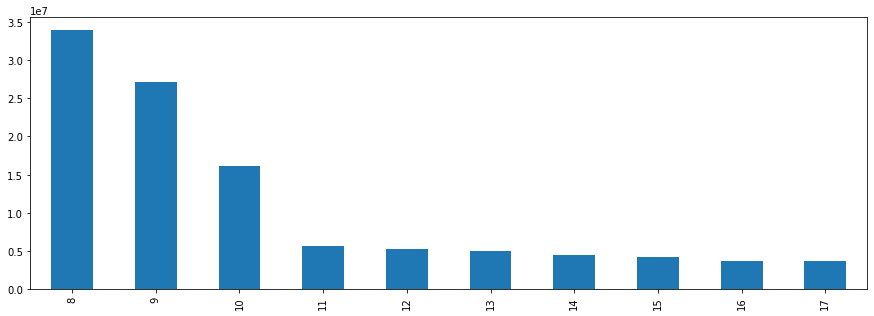

In [168]:
df4['Case_in_the_last_7_days'].nlargest(10).plot.bar()


<AxesSubplot:>

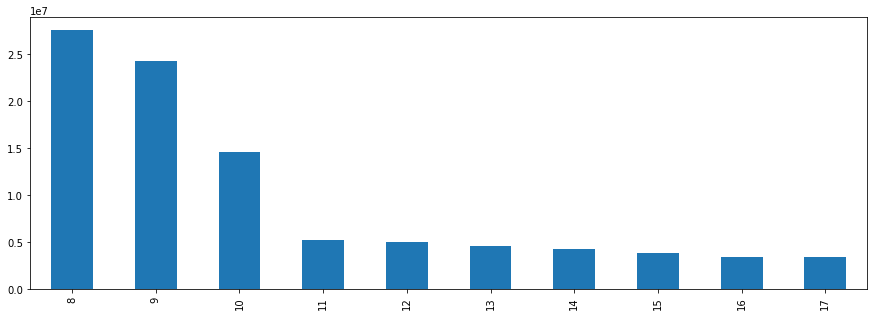

In [169]:
df4['Deaths_in_the_last_7days'].nlargest(10).plot.bar()

<AxesSubplot:>

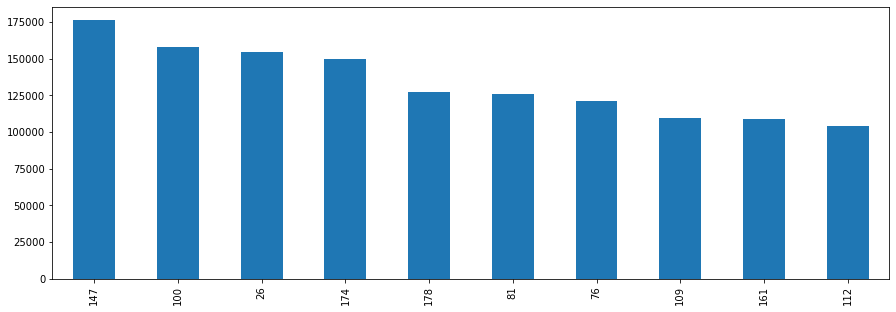

In [170]:
df4['Weekly_Case_Change'].nlargest(10).plot.bar()

<AxesSubplot:>

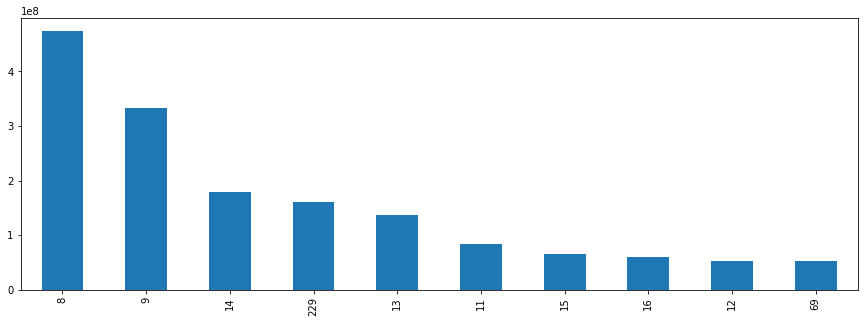

In [171]:
df4['Weekly_Deaths_Change'].nlargest(10).plot.bar()

# Bi varient

1. Scatter Plot	= Good for interval and some nominal categorical data.
2. Hex Plot	= Good for interval and some nominal categorical data.
3. Stacked Bar Chart = Good for nominal and ordinal categorical data.
4. Bivariate Line Chart = Good for ordinal categorical and interval data.

## SCATTER

The simplest bivariate plot is the lowly scatter plot. A simple scatter plot simply maps each variable of interest to a point in two-dimensional space. This is the result:


## Observation:

Here "df3" is taken as new Dataframe in which the only required columns are taken for better use of graphs/plots.

<AxesSubplot:xlabel='Country', ylabel='Case_in_the_last_7_days'>

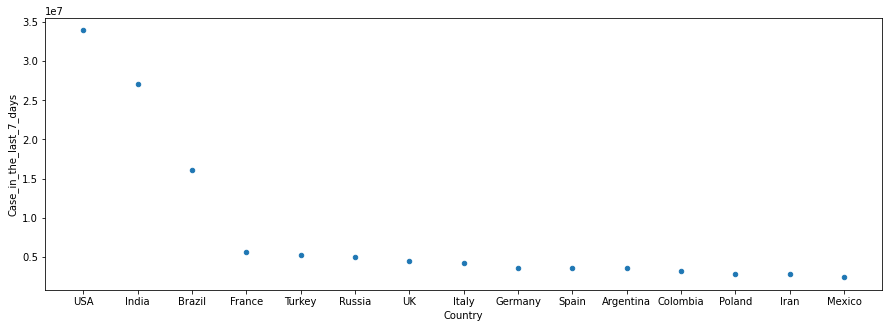

In [172]:
df4.nlargest(15,'Case_in_the_last_7_days').plot.scatter(x = 'Country', y = 'Case_in_the_last_7_days')


The main difference in between the 'Case_in_the_last_7_days' and 'Weekly_Case_Change' is that in Weekly_Case_Change we take the cases which have changed from positive to negitive in the Case_in_the_last_7_days we take only positive cases which are registered or those data which is recorded under respective government. 

# Observations:
## Risky places based on weekly wise data

From above and below plots , it clearly shows that these countries are risk/danger places for living because it has 'Highest - Case_in_the_last_7_days' & 'Deaths_in_the_last_7days' i.e.., high number of effected people are present in these areas.

<AxesSubplot:xlabel='Country', ylabel='Deaths_in_the_last_7days'>

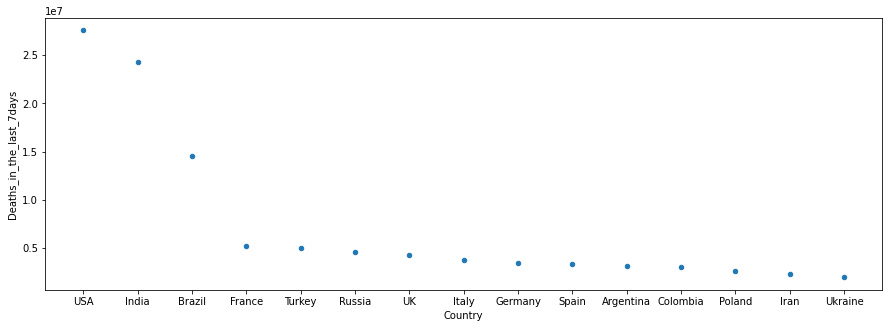

In [173]:
df4.nlargest(15,'Deaths_in_the_last_7days').plot.scatter(x = 'Country', y = 'Deaths_in_the_last_7days')


<AxesSubplot:xlabel='Country', ylabel='Weekly_Case_Change'>

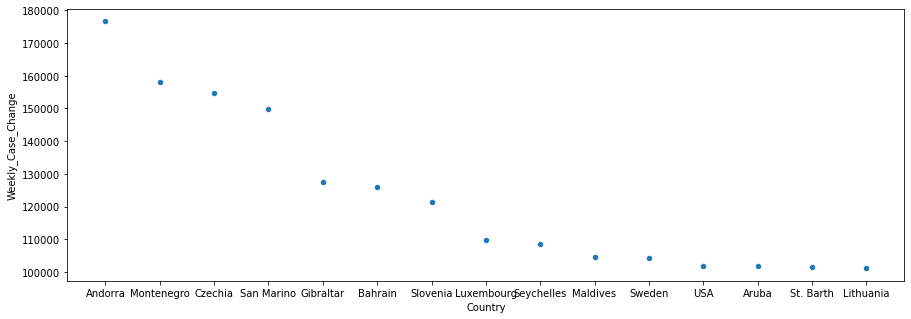

In [174]:
df4.nlargest(15,'Weekly_Case_Change').plot.scatter(x = 'Country', y = 'Weekly_Case_Change')


# Observations:
## Safe places based on weekly wise data

From the below plots , it clearly shows that these countries are super safe for living because it has 'smallest/lowest - Deaths_in_the_last_7days rate' i.e., in this places the deaths are less.

<AxesSubplot:xlabel='Country', ylabel='Deaths_in_the_last_7days'>

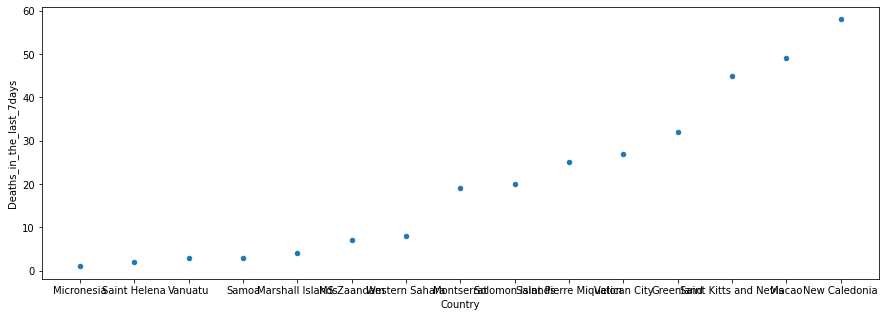

In [175]:
df4.nsmallest(15,'Deaths_in_the_last_7days').plot.scatter(x = 'Country', y = 'Deaths_in_the_last_7days')


## Stacked plots


Scatter plots and hex plots are new. But we can also use the simpler plots we saw in the last notebook.

The easiest way to modify them to support another visual variable is by using stacking. A stacked chart is one which plots the variables one on top of the other.



In this graph it clearly tells that there are spreading of cases and deaths of people  are much higher


## Present scenario all over the world 

<AxesSubplot:>

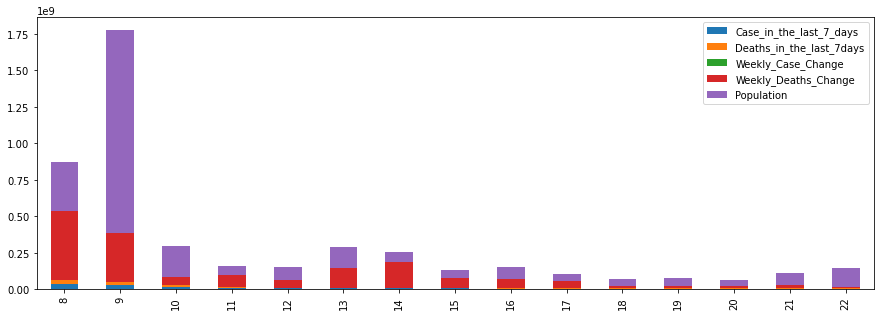

In [176]:
df4.nlargest(15, 'Case_in_the_last_7_days').plot.bar(stacked=True)


Here 8 is having higher than all the numbers. 8 is USA so it tells that USA are having higher death cases and next 11 it is france the table is below according to given data

<AxesSubplot:>

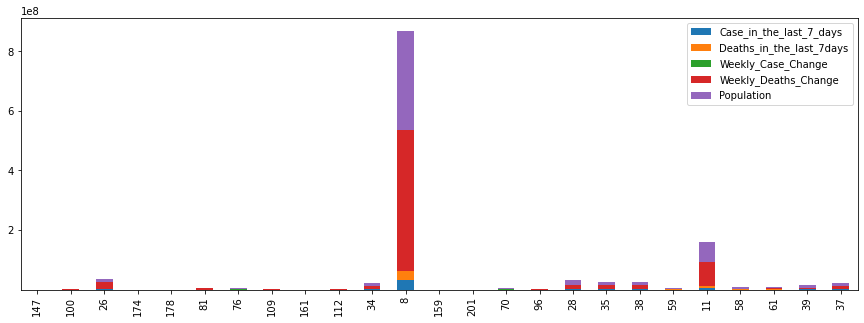

In [177]:
df4.nlargest(25, 'Weekly_Case_Change').plot.bar(stacked=True)


In [178]:
df4.columns

Index(['Country', 'Case_in_the_last_7_days', 'Deaths_in_the_last_7days',
       'Weekly_Case_Change', 'Weekly_Deaths_Change', 'Population'],
      dtype='object')

In [179]:
df4

,Country,Case_in_the_last_7_days,Deaths_in_the_last_7days,Weekly_Case_Change,Weekly_Deaths_Change,Population
8,USA,33924707,27564594,101956,474388680,332738490
9,India,27122158,24278735,19483,332594176,1392123725
10,Brazil,16121136,14552024,75364,49013934,213910194
11,France,5605895,5222049,85713,83136527,65402812
12,Turkey,5203385,5045508,61109,52817437,85149488
...,...,...,...,...,...,...
225,Marshall Islands,4,4,67,0,59547
226,Samoa,3,3,15,0,199593
227,Saint Helena,2,2,328,0,6093
228,Micronesia,1,1,9,0,116100


In [196]:
large1 = df4.nlargest(10, 'Deaths_in_the_last_7days')
large1

,Country,Case_in_the_last_7_days,Deaths_in_the_last_7days,Weekly_Case_Change,Weekly_Deaths_Change,Population
8,USA,33924707,27564594,101956,474388680,332738490
9,India,27122158,24278735,19483,332594176,1392123725
10,Brazil,16121136,14552024,75364,49013934,213910194
11,France,5605895,5222049,85713,83136527,65402812
12,Turkey,5203385,5045508,61109,52817437,85149488
13,Russia,5017795,4632955,34371,136100000,145990507
14,UK,4467310,4305971,65498,178307058,68204982
15,Italy,4197892,3804246,69522,64918613,60382159
16,Germany,3660547,3423700,43566,59197639,84023708
17,Spain,3652879,3402258,78101,49708830,46770998


## Bivariate line chart

One plot type we've seen already that remains highly effective when made bivariate is the line chart. Because the line in this chart takes up so little visual space, it's really easy and effective to overplot multiple lines on the same chart.

<AxesSubplot:>

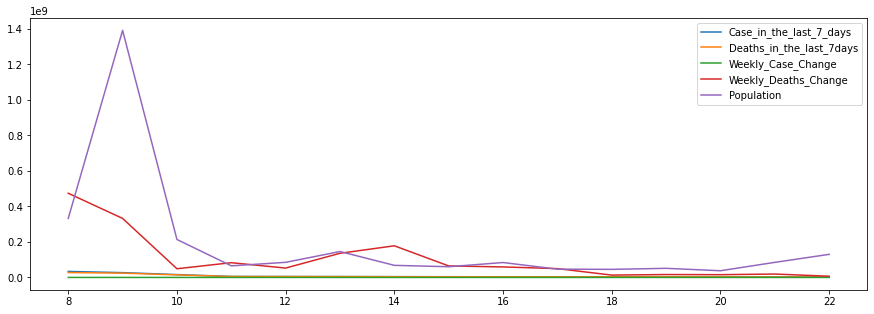

In [180]:
df4.head(15).plot.line()

There is no much difference between 'Case_in_the_last_7_days' & 'Deaths_in_the_last_7days'.

<AxesSubplot:>

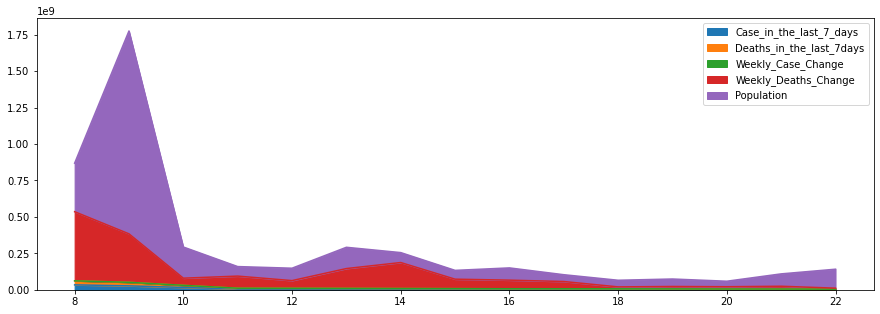

In [181]:

df4.nlargest(15, 'Case_in_the_last_7_days').plot.area()

<AxesSubplot:>

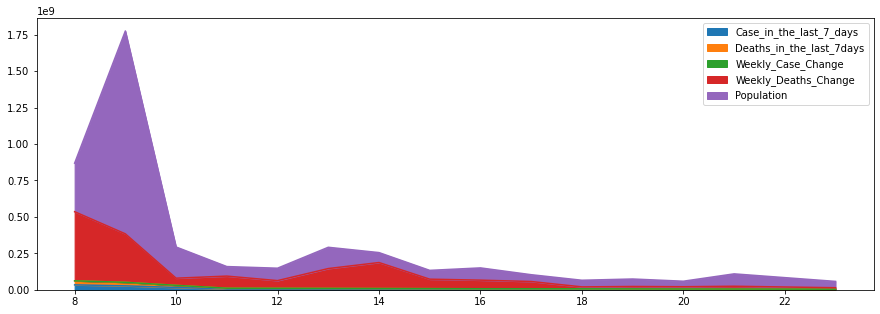

In [182]:
df4.nlargest(15, 'Deaths_in_the_last_7days').plot.area()

# Multivarient 

1. Multivariate Scatter Plot = df.plot.scatter()	
2. Grouped Box Plot = df.plot.box()	
3. Heatmap = sns.heatmap	
4. Parallel Coordinates = pd.plotting.parallel_coordinates



## here large1 indicates the vlue of nlargest of deaths in the last 7 days

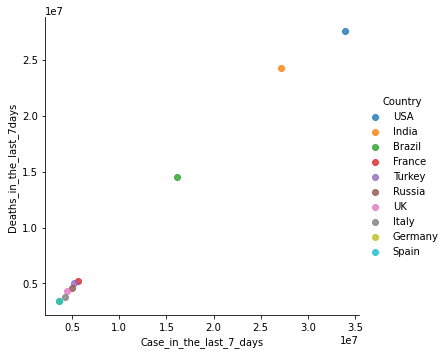

In [203]:

sns.lmplot(x='Case_in_the_last_7_days', y='Deaths_in_the_last_7days', hue='Country', data=large1)
                                                                                                  


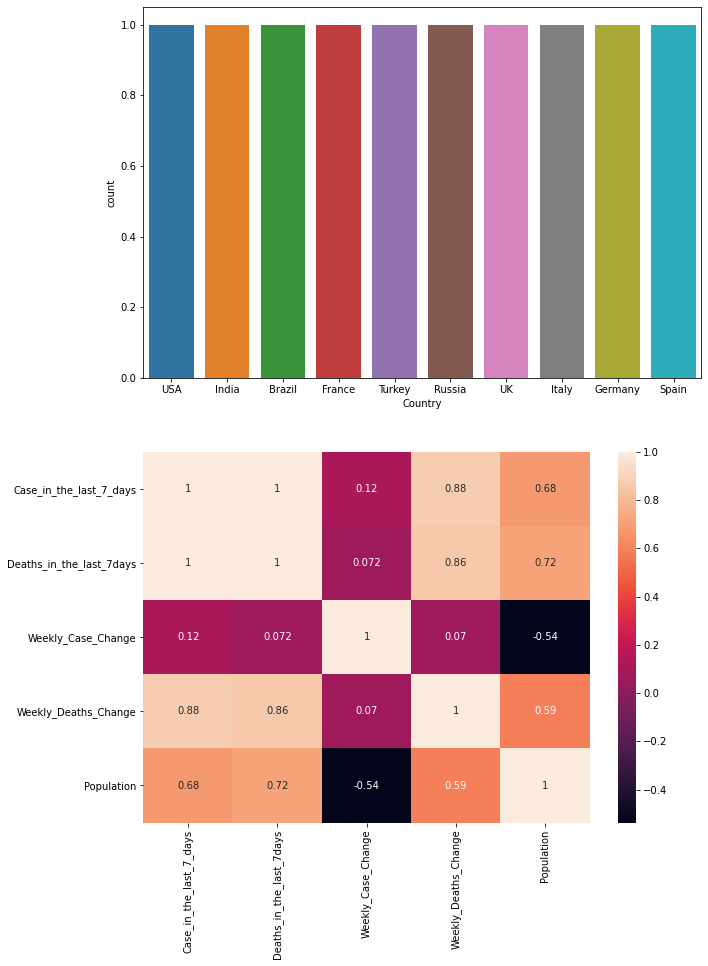

In [201]:
# large1 is nlargest of "Deaths_in_the_last_7days"
plt.figure(figsize=(10,15))
plt.subplot(2,1,1)
sns.countplot(x='Country',data=large1)


plt.subplot(2,1,2)
sns.heatmap(large1.corr(),annot=True)
plt.show()                                                                                                  

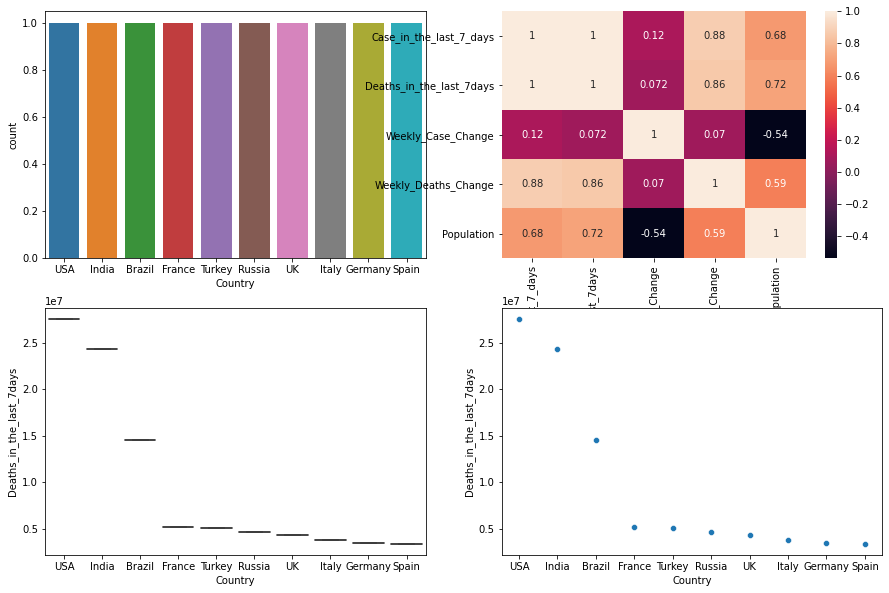

In [211]:
plt.figure(figsize=(15,10))
plt.subplot(221)
sns.countplot(x='Country',data=large1)

plt.subplot(222)
sns.heatmap(large1.corr(),annot=True)

plt.subplot(223)
sns.boxplot(x='Country',y='Deaths_in_the_last_7days',data=large1)

plt.subplot(224)
sns.scatterplot(x='Country',y='Deaths_in_the_last_7days',data=large1)

plt.show()

# Observation:
# Comparision of two table data 
Here comes the difference between daily data & weekly data

Below one is 'Total_Cases' in daily wise data
and next one is the 'Case_in_the_last_7_days' i.e.., weekly wise data

<AxesSubplot:>

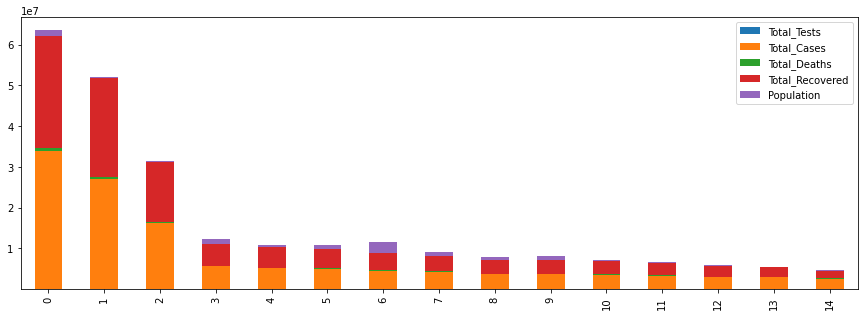

In [185]:
data_1.nlargest(15, 'Total_Cases').plot.bar(stacked=True)


<AxesSubplot:>

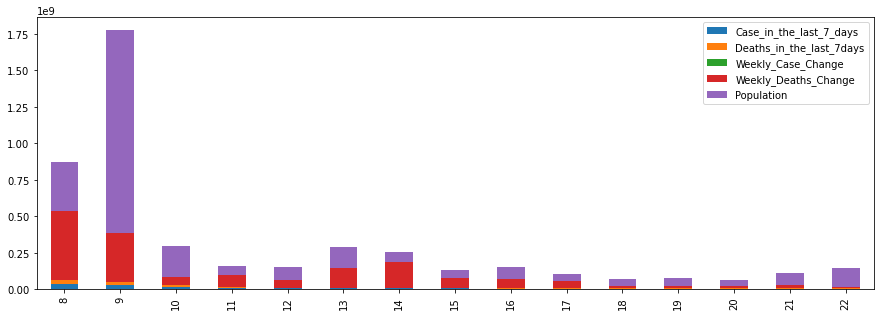

In [186]:
df4.nlargest(15, 'Case_in_the_last_7_days').plot.bar(stacked = True)

In [187]:
data_1.columns

Index(['Country', 'Total_Tests', 'Total_Cases', 'Total_Deaths',
       'Total_Recovered', 'Population'],
      dtype='object')

<AxesSubplot:>

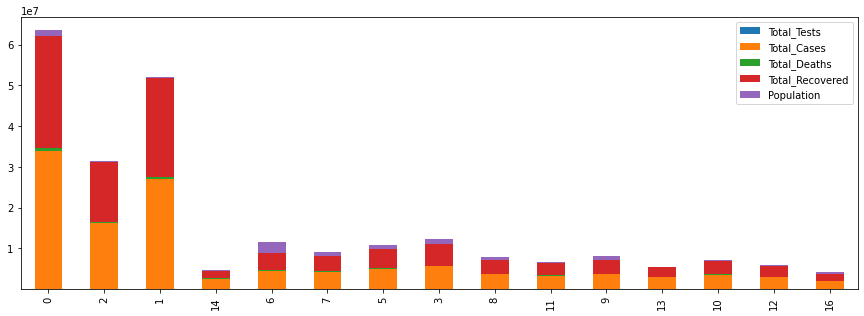

In [188]:
data_1.nlargest(15, 'Total_Deaths').plot.bar(stacked=True)


<AxesSubplot:>

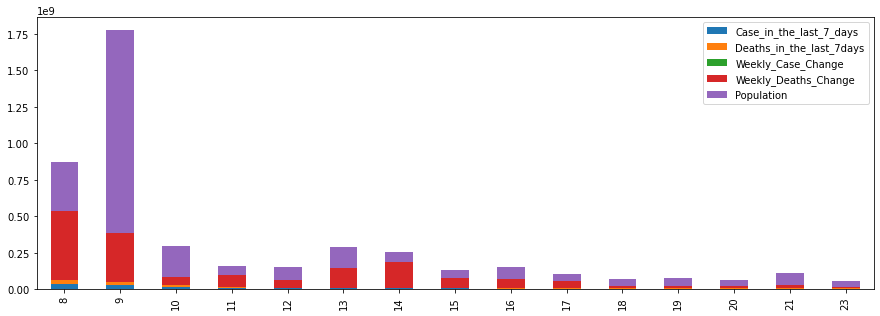

In [189]:
df4.nlargest(15, 'Deaths_in_the_last_7days').plot.bar(stacked = True)

## Highest of 'Deaths_in_the_last_7days' are USA , Brazil , India , France ,Turkey .

## Highest of 'Case_in_the_last_7_days' are   Brazil , India , France ,Turkey .

## Smallest of 'Case_in_the_last_7_days' are Micronesia , Saint Helena , Samoa , Falkland Islands , Vanuatu.

## Smallest of 'Deaths_in_the_last_7days' are Micronesia , Saint Helena , Samoa , France , Marshall Islands.
